<a href="https://colab.research.google.com/github/Pkolekar940/Bike-sharing-Demand-Prediction/blob/main/Bike_sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike sharing Demand Sharing 



# **Project Summary -**

In [425]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')



# **GitHub Link -**

https://bit.ly/3J0xHxS

# **Problem Statement**


In [325]:
# Let's import our dataset 
import pandas as pd

url = 'https://drive.google.com/file/d/1dZ7p614gC_iwxHwcj-1N0Lc155AGMTJS/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

data = pd.read_csv(url, encoding='latin1')


# **Understand More About The Data**

In [326]:
# Let's View the data of random rows to take a glimps of the data
data.sample(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
2696  23/03/2018               1216     8              2.6           77   
2788  27/03/2018                 95     4              7.8           70   
4269  27/05/2018               1729    21             19.5           46   
7666  16/10/2018                854    10             14.4           45   
4558  08/06/2018               2140    22             20.5           78   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
2696               1.3               567                       -1.0   
2788               0.3               395                        2.6   
4269               1.8              1734                        7.5   
7666               0.6              1206                        2.6   
4558               0.9               550                       16.5   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
2696                     0.21           0.0            0.0  Spring   
2788                     0.00           0.0            0.0  Spring   
4269                     0.00           0.0            0.0  Spring   
7666                     1.28           0.0            0.0  Autumn   
4558                     0.00           0.0            0.0  Summer   

         Holiday Functioning Day  
2696  No Holiday             Yes  
2788  No Holiday             Yes  
4269  No Holiday             Yes  
7666  No Holiday             Yes  
4558  No Holiday             Yes

In [327]:
# Let's check details about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [328]:
# Let's generate descriptive statistics of a dataset
data.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [329]:
#Getting the shape of dataset with rows and columns
print(data.shape)

(8760, 14)


##Missing values

In [330]:
#check for count of missing values in each column.
data.isna().sum()
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* ***As we can see above there are no missing value presents thankfully***

##Duplicate values

In [331]:
# let's check is there any ducplicate value present in our data or not
data.duplicated().sum()

0

* ***In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

* ***In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

In [332]:
# Rename the complex columns name
data=data.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [333]:
# creating new dataframe in order to apply some staticle 
num_dat=data[['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall']]

In [334]:
# Let's check the correlation between Rented Bike Count and other features 
data.corr()['Rented_Bike_Count']

Rented_Bike_Count        1.000000
Hour                     0.410257
Temperature              0.538558
Humidity                -0.199780
Wind_speed               0.121108
Visibility               0.199280
Dew_point_temperature    0.379788
Solar_Radiation          0.261837
Rainfall                -0.123074
Snowfall                -0.141804
Name: Rented_Bike_Count, dtype: float64

We can clearly see here Hour, Tempreature, Dew point tempreature and Solar Radiation highly correlated with Rented Bike Count

In [335]:
data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

## Converting to datetime datatype

* ***Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.***





In [336]:
# Let's Converting to datetime datatype
data['Date']=pd.to_datetime(data['Date'])

In [337]:
# Let's extract year from the date module
data['date_year']=data['Date'].dt.year

# Let's extract Months from the date module
data['date_months']=data['Date'].dt.month

# Let's extract Day from the date module
data['date_day']=data['Date'].dt.day_name()


In [338]:
# Let's find value count of date year
data['date_year'].value_counts()

2018    8016
2017     744
Name: date_year, dtype: int64

In [339]:
# Create a new column 'weekdays_weekend' based on 'Date'

data['weekdays_weekend'] = pd.to_datetime(data['Date']).dt.day_name()
data['weekdays_weekend'] = data['weekdays_weekend'].apply(lambda x: 0 if x in ['Saturday', 'Sunday'] else 1 )


In [340]:

data['weekdays_weekend'].value_counts()

1    6216
0    2544
Name: weekdays_weekend, dtype: int64

In [341]:
data.sample(5)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
5064 2018-06-30               1275     0         23.0        84         1.9   
980  2018-10-01                207    20         -8.9        41         2.3   
2734 2018-03-24                460    22          6.5        85         2.3   
489  2017-12-21                265     9         -5.3        88         0.4   
7062 2018-09-21                 23     6         17.6        95         1.7   

      Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
5064         375                   20.1             0.00       0.0       0.0   
980         2000                  -19.7             0.00       0.0       0.0   
2734         167                    4.1             0.00       0.0       0.0   
489          463                   -6.9             0.21       0.0       2.2   
7062         974                   16.7             0.00       1.5       0.0   

     Seasons     Holiday Functioning_Day  date_year  date_months  date_day  \
5064  Summer  No Holiday             Yes       2018            6  Saturday   
980   Winter  No Holiday             Yes       2018           10    Monday   
2734  Spring  No Holiday             Yes       2018            3  Saturday   
489   Winter  No Holiday             Yes       2017           12  Thursday   
7062  Autumn  No Holiday             Yes       2018            9    Friday   

      weekdays_weekend  
5064                 0  
980                  1  
2734                 0  
489                  1  
7062                 1

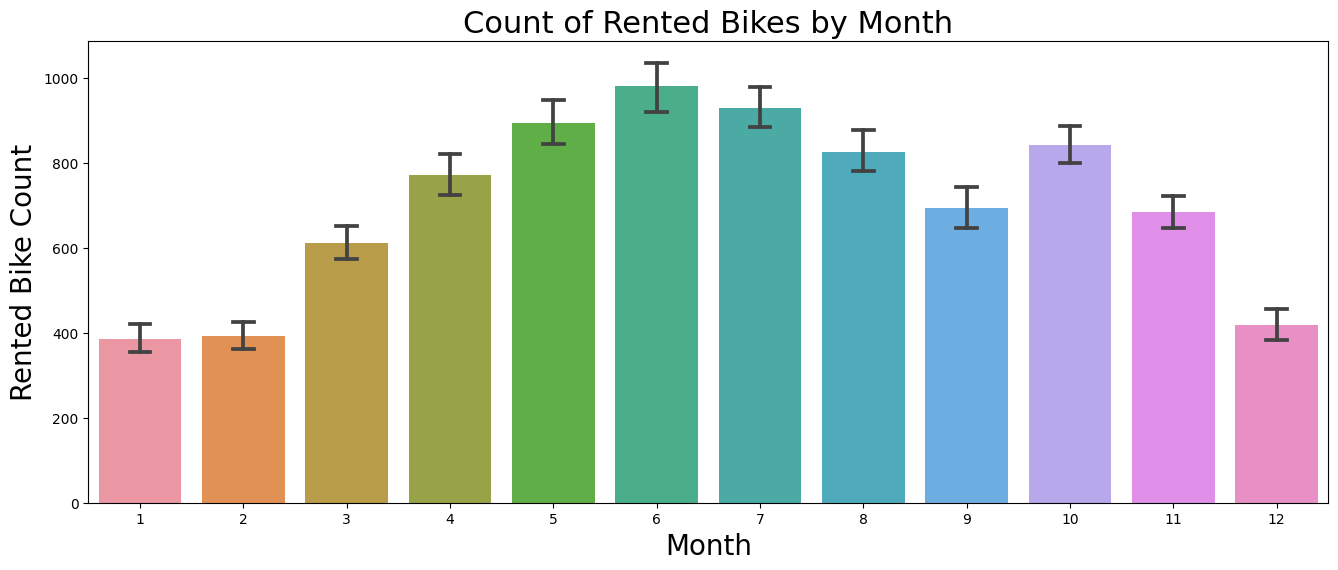

In [342]:
# Let's plot barchart Rented Bike Count VS Months.

fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(data=data, x='date_months', y='Rented_Bike_Count', ax=ax, capsize=.2)
ax.set_title('Count of Rented Bikes by Month', fontsize=22)
ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Rented Bike Count', fontsize=20)

plt.show()


* From the above bar plot we can clearly say that from  the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.

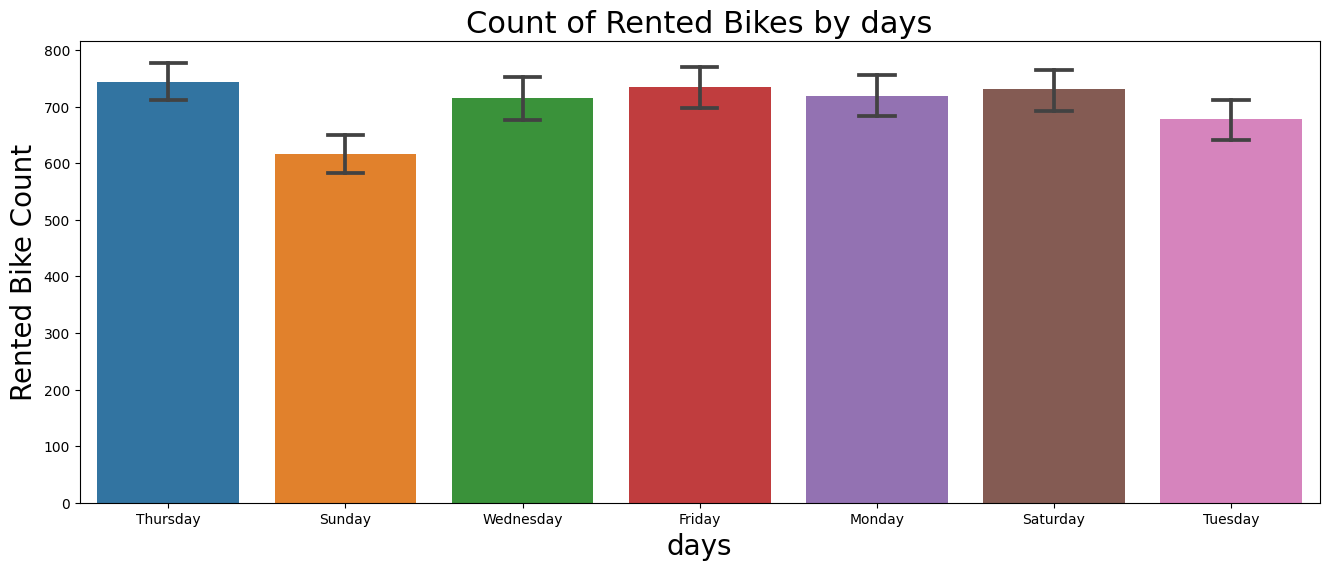

In [343]:
# Let's plot barchart Rented Bike Count VS Days.

fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(data=data, x='date_day', y='Rented_Bike_Count', ax=ax, capsize=.2)
ax.set_title('Count of Rented Bikes by days', fontsize=22)
ax.set_xlabel('days', fontsize=20)
ax.set_ylabel('Rented Bike Count', fontsize=20)

plt.show()


[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

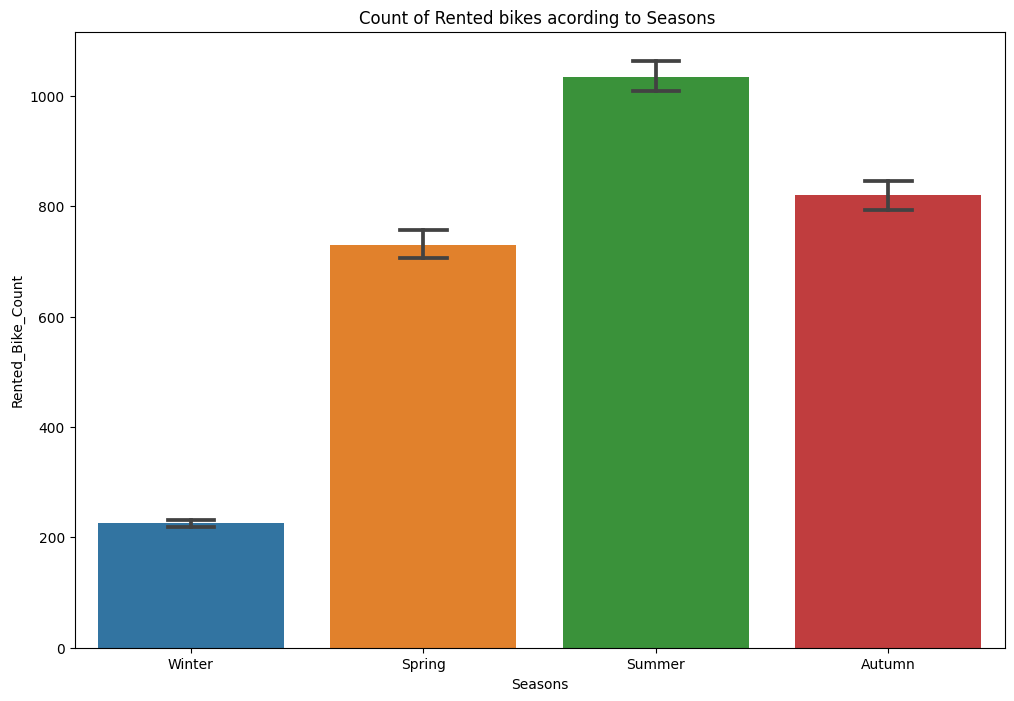

In [344]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,8))
sns.barplot(data=data,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

We can see here in Count of Rented bikes acording to Seasons chart in summer seasons it's more than 1000 rented bikes count

In [345]:
data.head(10)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0 2017-01-12                254     0         -5.2        37         2.2   
1 2017-01-12                204     1         -5.5        38         0.8   
2 2017-01-12                173     2         -6.0        39         1.0   
3 2017-01-12                107     3         -6.2        40         0.9   
4 2017-01-12                 78     4         -6.0        36         2.3   
5 2017-01-12                100     5         -6.4        37         1.5   
6 2017-01-12                181     6         -6.6        35         1.3   
7 2017-01-12                460     7         -7.4        38         0.9   
8 2017-01-12                930     8         -7.6        37         1.1   
9 2017-01-12                490     9         -6.5        27         0.5   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                  -17.6             0.00       0.0       0.0   
1        2000                  -17.6             0.00       0.0       0.0   
2        2000                  -17.7             0.00       0.0       0.0   
3        2000                  -17.6             0.00       0.0       0.0   
4        2000                  -18.6             0.00       0.0       0.0   
5        2000                  -18.7             0.00       0.0       0.0   
6        2000                  -19.5             0.00       0.0       0.0   
7        2000                  -19.3             0.00       0.0       0.0   
8        2000                  -19.8             0.01       0.0       0.0   
9        1928                  -22.4             0.23       0.0       0.0   

  Seasons     Holiday Functioning_Day  date_year  date_months  date_day  \
0  Winter  No Holiday             Yes       2017            1  Thursday   
1  Winter  No Holiday             Yes       2017            1  Thursday   
2  Winter  No Holiday             Yes       2017            1  Thursday   
3  Winter  No Holiday             Yes       2017            1  Thursday   
4  Winter  No Holiday             Yes       2017            1  Thursday   
5  Winter  No Holiday             Yes       2017            1  Thursday   
6  Winter  No Holiday             Yes       2017            1  Thursday   
7  Winter  No Holiday             Yes       2017            1  Thursday   
8  Winter  No Holiday             Yes       2017            1  Thursday   
9  Winter  No Holiday             Yes       2017            1  Thursday   

   weekdays_weekend  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
5                 1  
6                 1  
7                 1  
8                 1  
9                 1

In [346]:
# Let's define the temperature bins
bins = [-20, -10, 0, 10, 20, 30, 40]

# Create a new column 'Temperature_Bins' in the DataFrame
data['Temperature_Bins'] = pd.cut(data['Temperature'], bins)

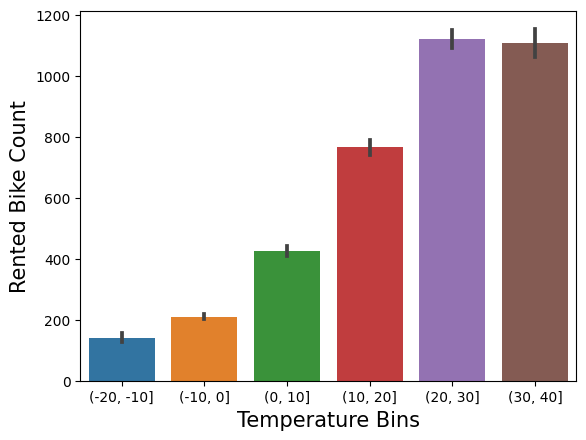

In [347]:
# Let's plot a bar chart to see graph Rented Bike Count vs Temperature
sns.barplot(x=data['Temperature_Bins'], y=data['Rented_Bike_Count'])

# Set the axis labels
plt.xlabel('Temperature Bins' , fontsize=15)
plt.ylabel('Rented Bike Count', fontsize=15)

# Display the plot
plt.show()


[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

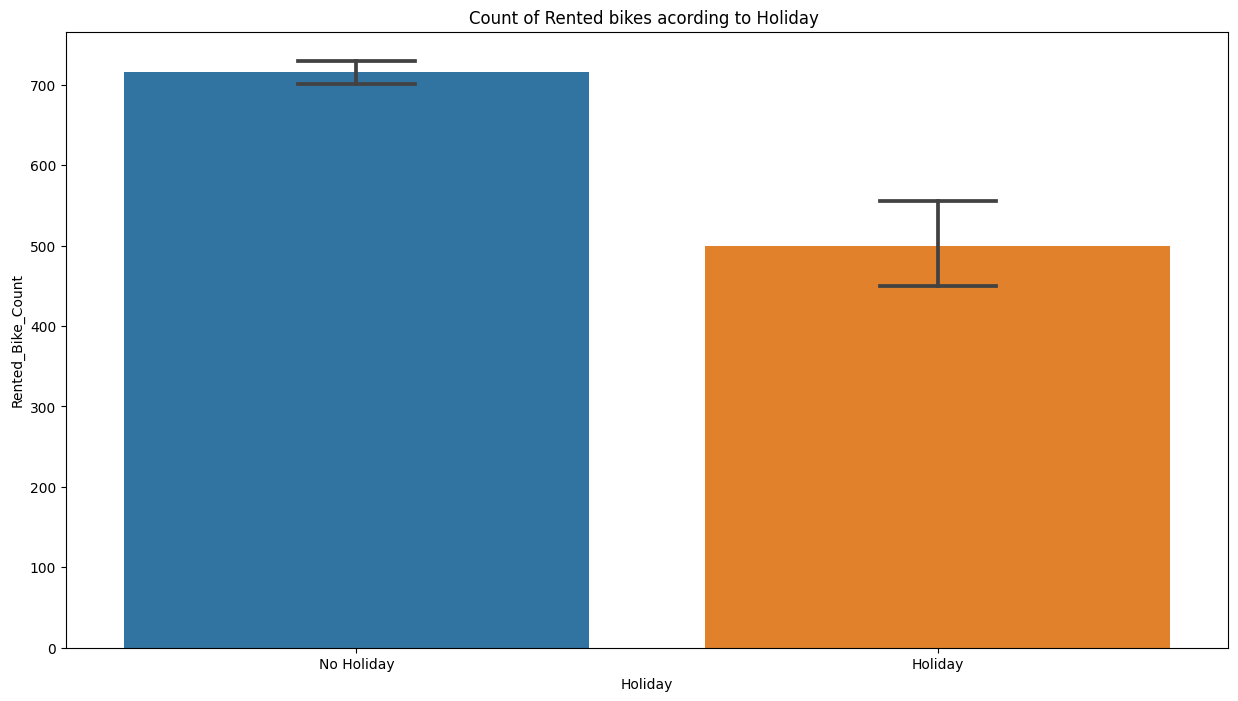

In [348]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=data,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

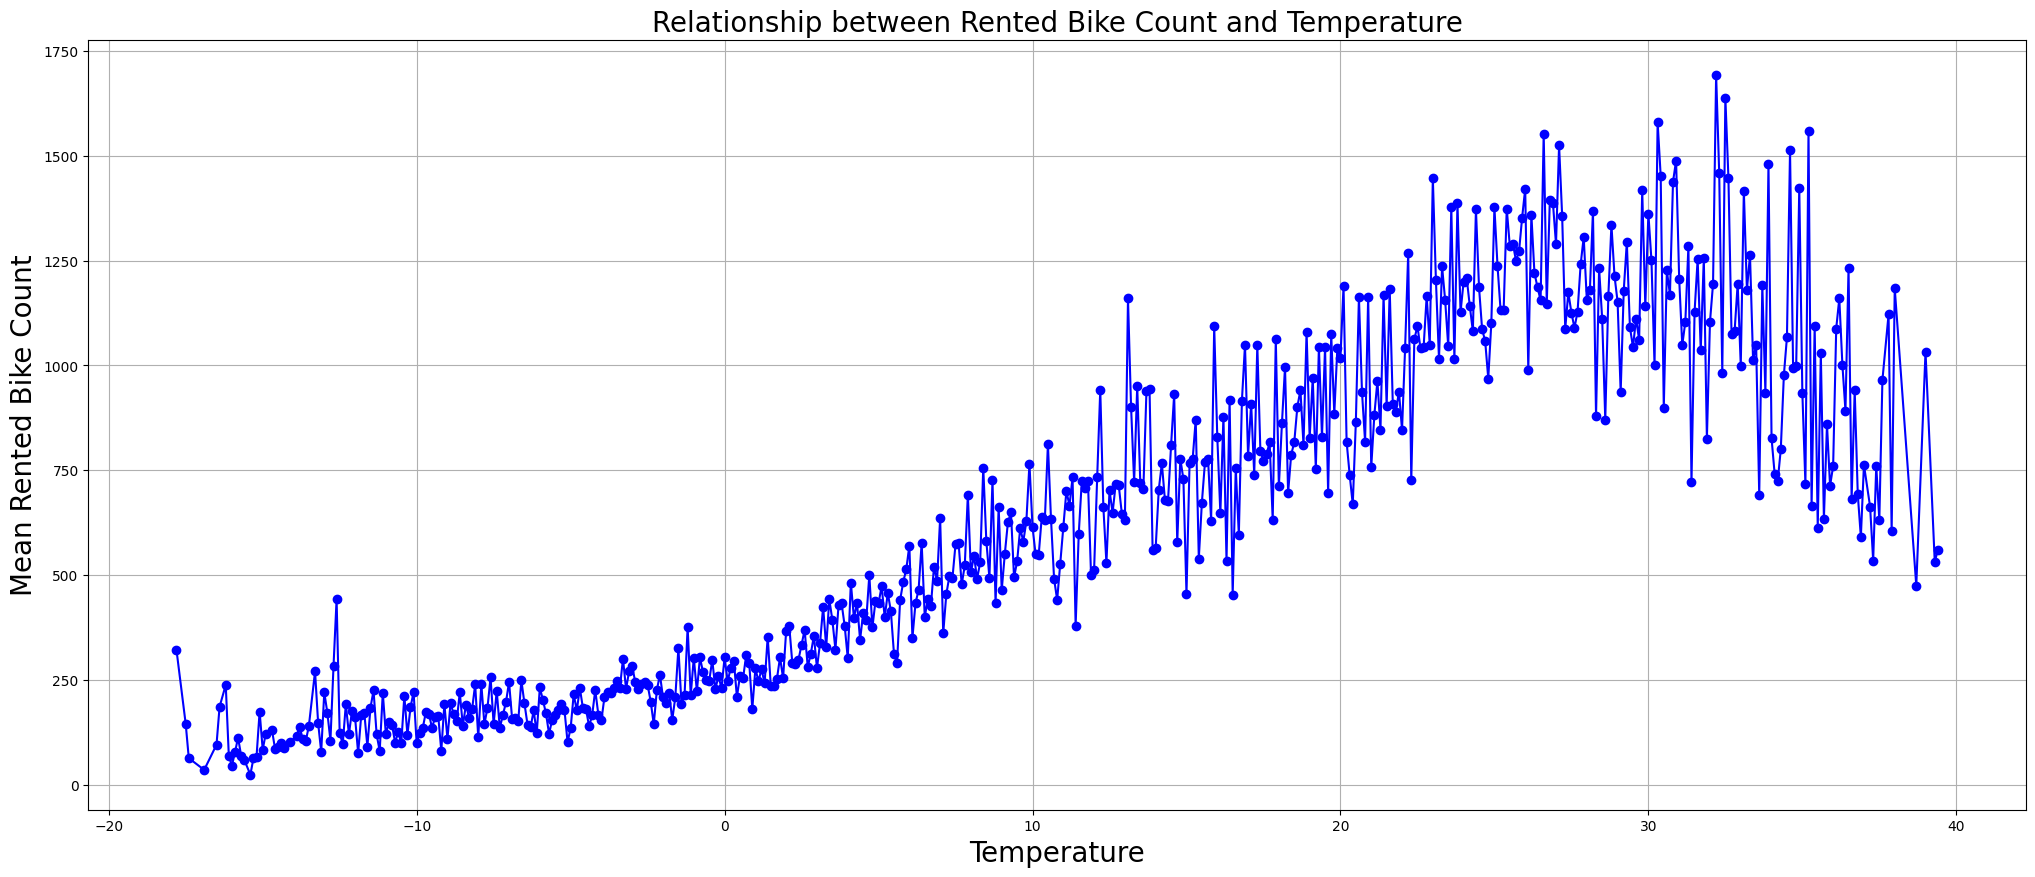

In [349]:
# Let's Group the data by 'Temperature' and calculate the mean of 'Rented_Bike_Count'
grouped_data = data.groupby('Temperature')['Rented_Bike_Count'].mean()

# Let's Plotting the relationship between 'Rented_Bike_Count' and 'Temperature'
plt.figure(figsize=(25, 10))
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', color='b')
plt.xlabel('Temperature',fontsize=20)
plt.ylabel('Mean Rented Bike Count',fontsize=20)
plt.title('Relationship between Rented Bike Count and Temperature',fontsize=20)
plt.grid(True)
plt.show()


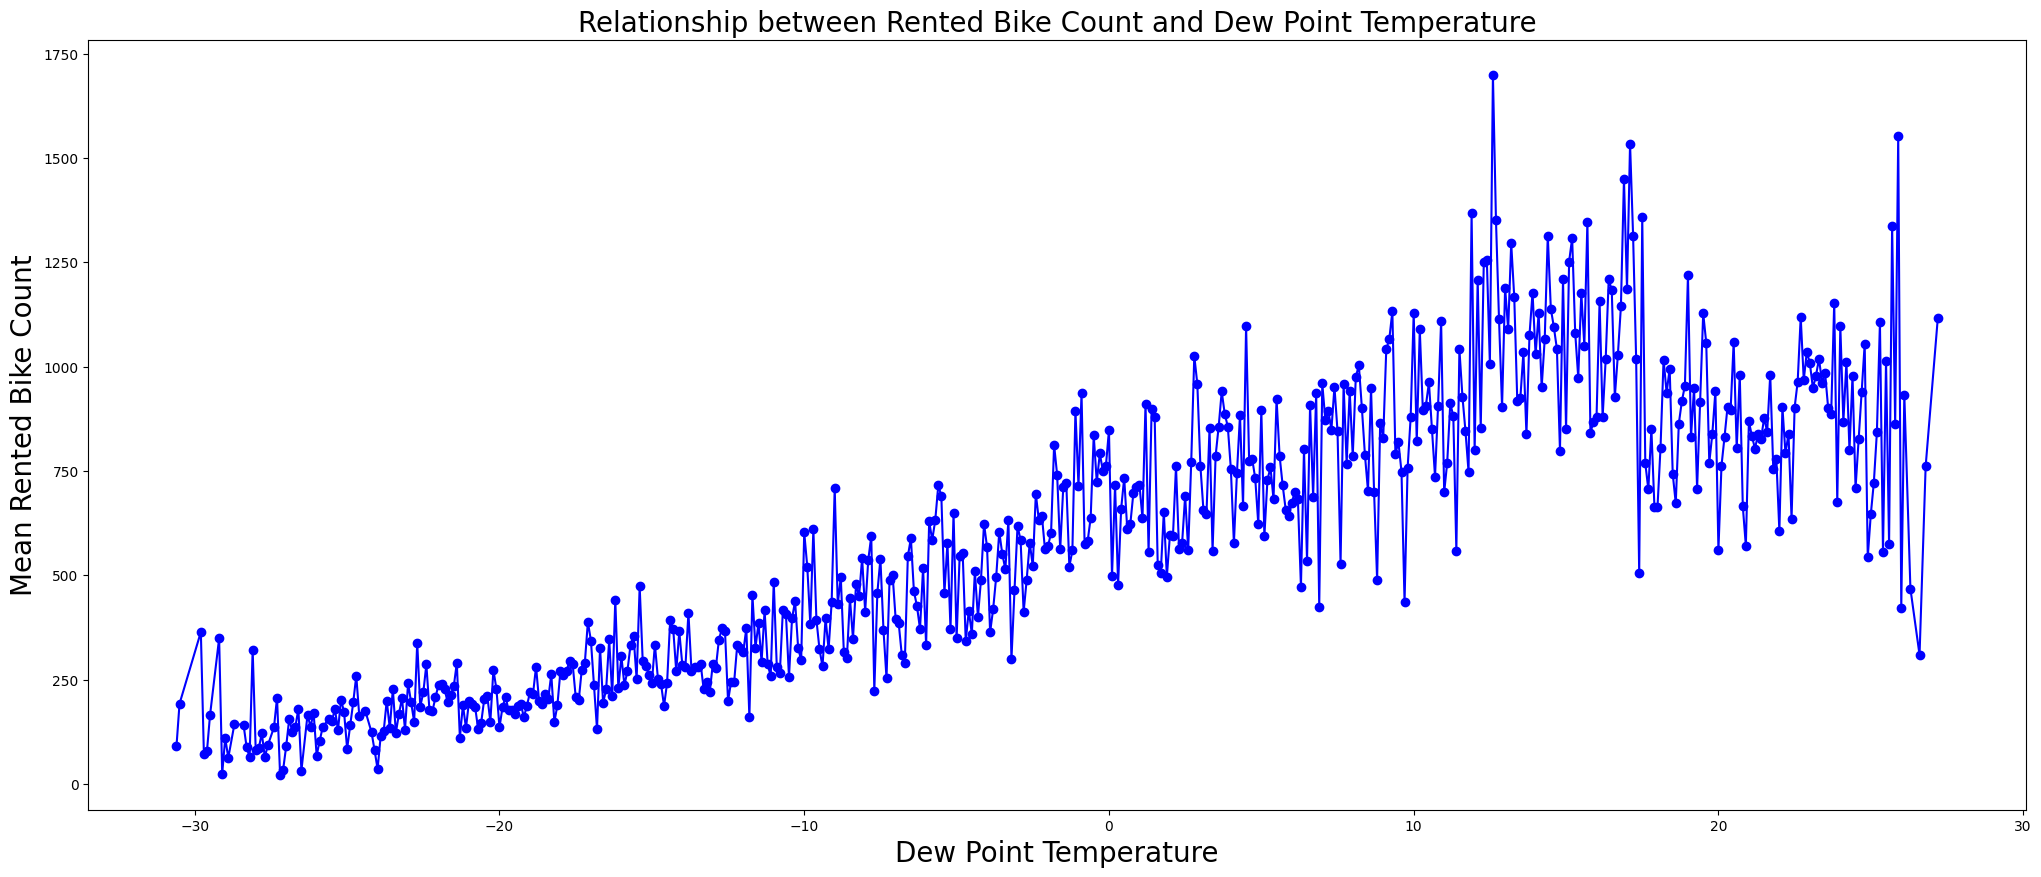

In [350]:
# Let's plot Relationship between Rented Bike Count and Dew Point Temperature.
plt.figure(figsize=(25, 10))
data.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot(marker='o', linestyle='-', color='b')

plt.xlabel('Dew Point Temperature',fontsize=20)
plt.ylabel('Mean Rented Bike Count',fontsize=20)
plt.title('Relationship between Rented Bike Count and Dew Point Temperature',fontsize=20)

plt.show()


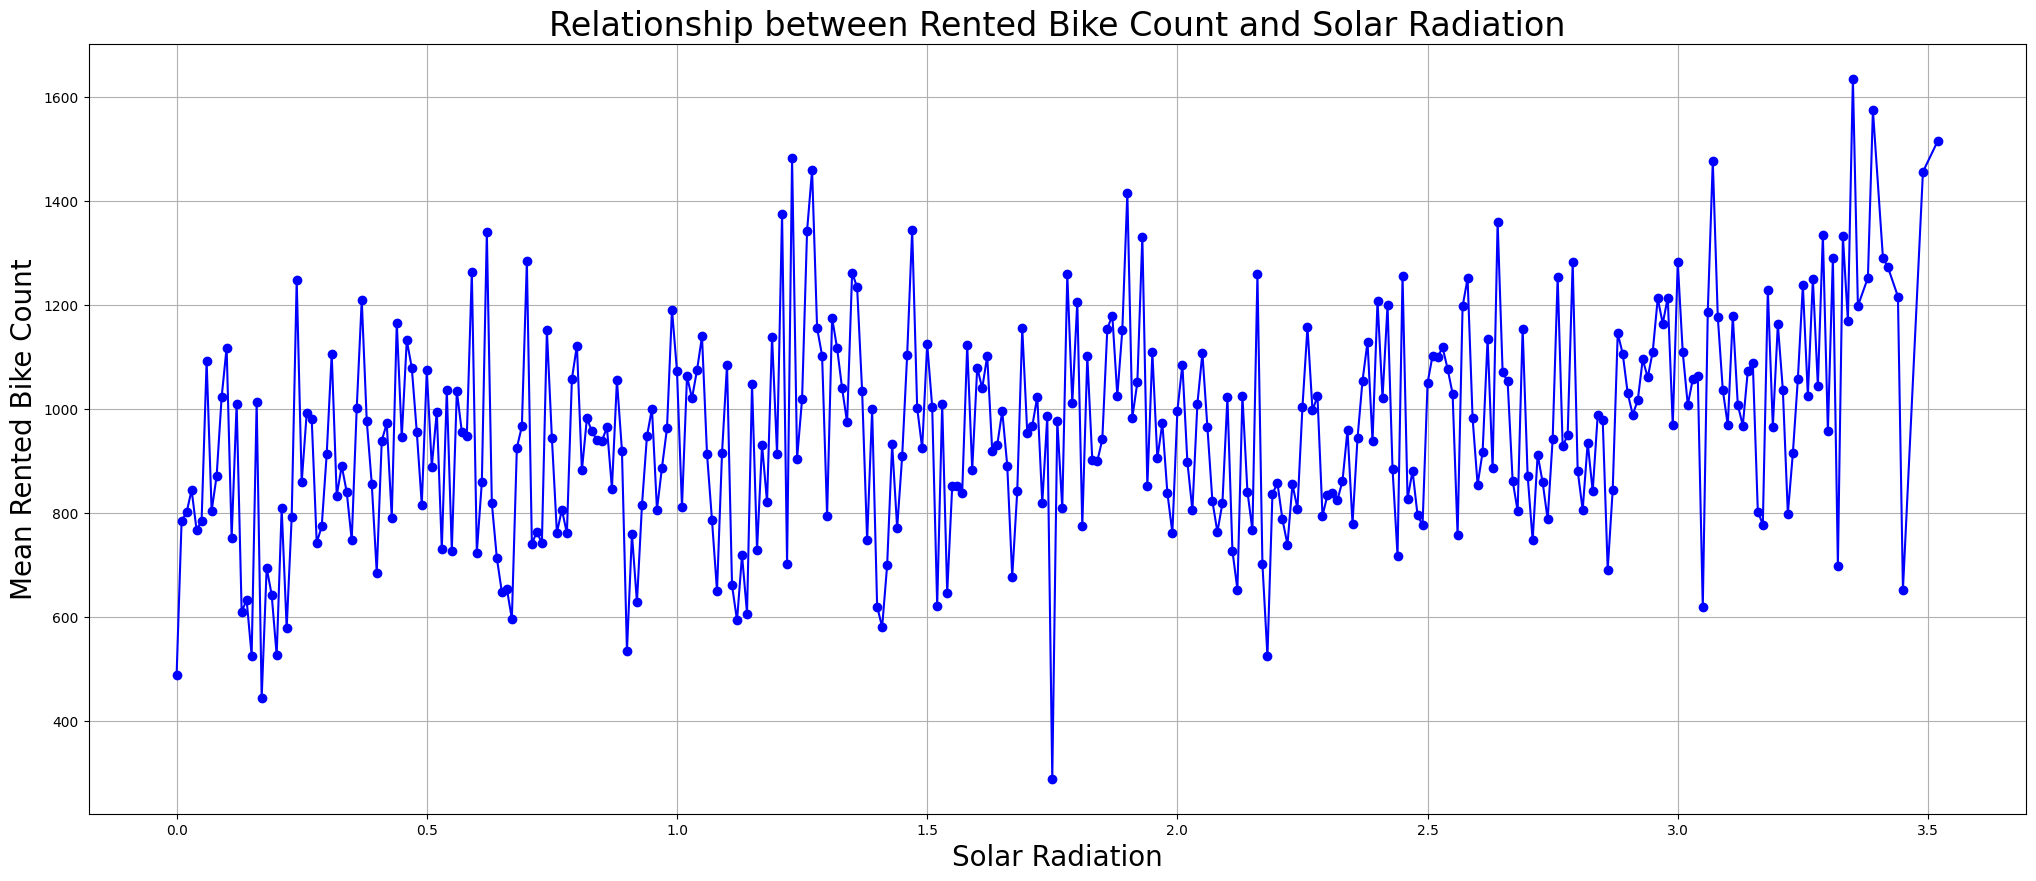

<Figure size 2500x1000 with 0 Axes>

In [351]:
# Let's plot a graph about Relationship between Rented Bike Count and Solar Radiation.
plt.figure(figsize=(25,10))
data.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot(marker='o', linestyle='-', color='b')
plt.xlabel('Solar Radiation', fontsize=20)  
plt.ylabel('Mean Rented Bike Count', fontsize=20)  
plt.title('Relationship between Rented Bike Count and Solar Radiation', fontsize=24)
plt.grid(True)
plt.figure(figsize=(25, 10))

plt.show()


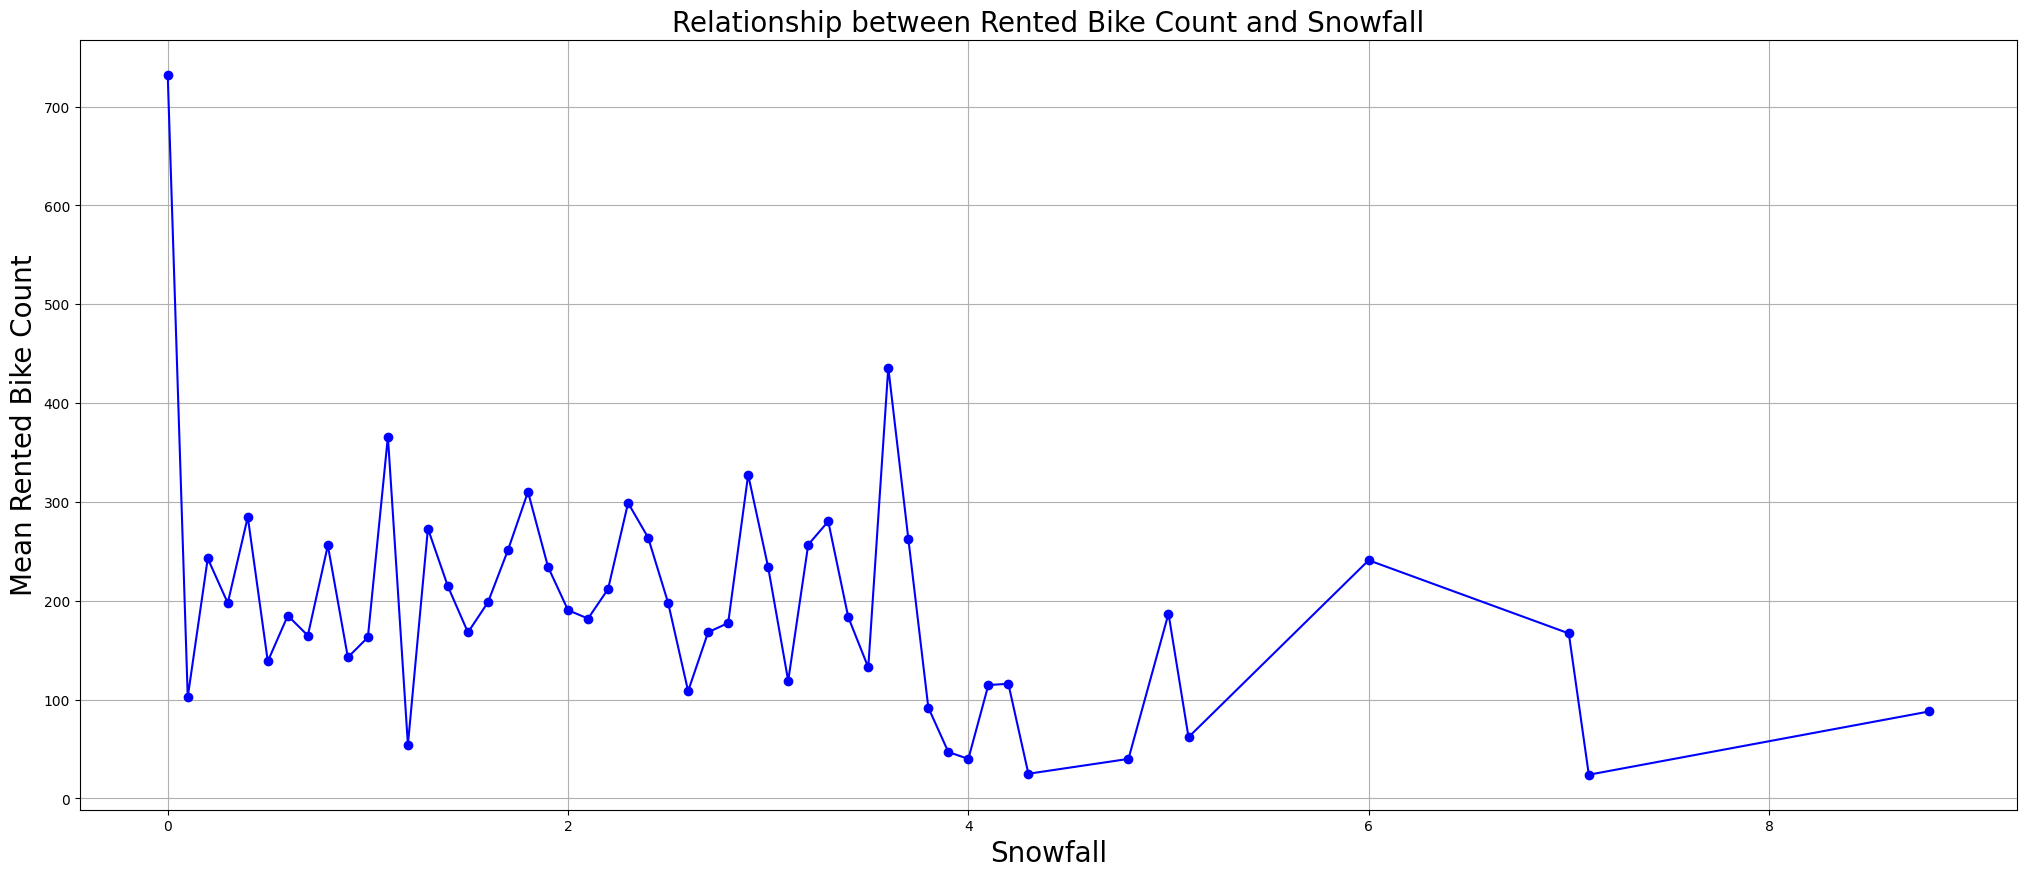

In [352]:


# Group the data by 'Snowfall' and calculate the mean of 'Rented_Bike_Count'
grouped_data = data.groupby('Snowfall')['Rented_Bike_Count'].mean()

# Plotting the relationship between 'Rented_Bike_Count' and 'Snowfall'
plt.figure(figsize=(25,10))
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', color='b')
plt.xlabel('Snowfall',fontsize=20)
plt.ylabel('Mean Rented Bike Count',fontsize=20)
plt.title('Relationship between Rented Bike Count and Snowfall',fontsize=20)
plt.grid(True)
plt.show()


* from the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000

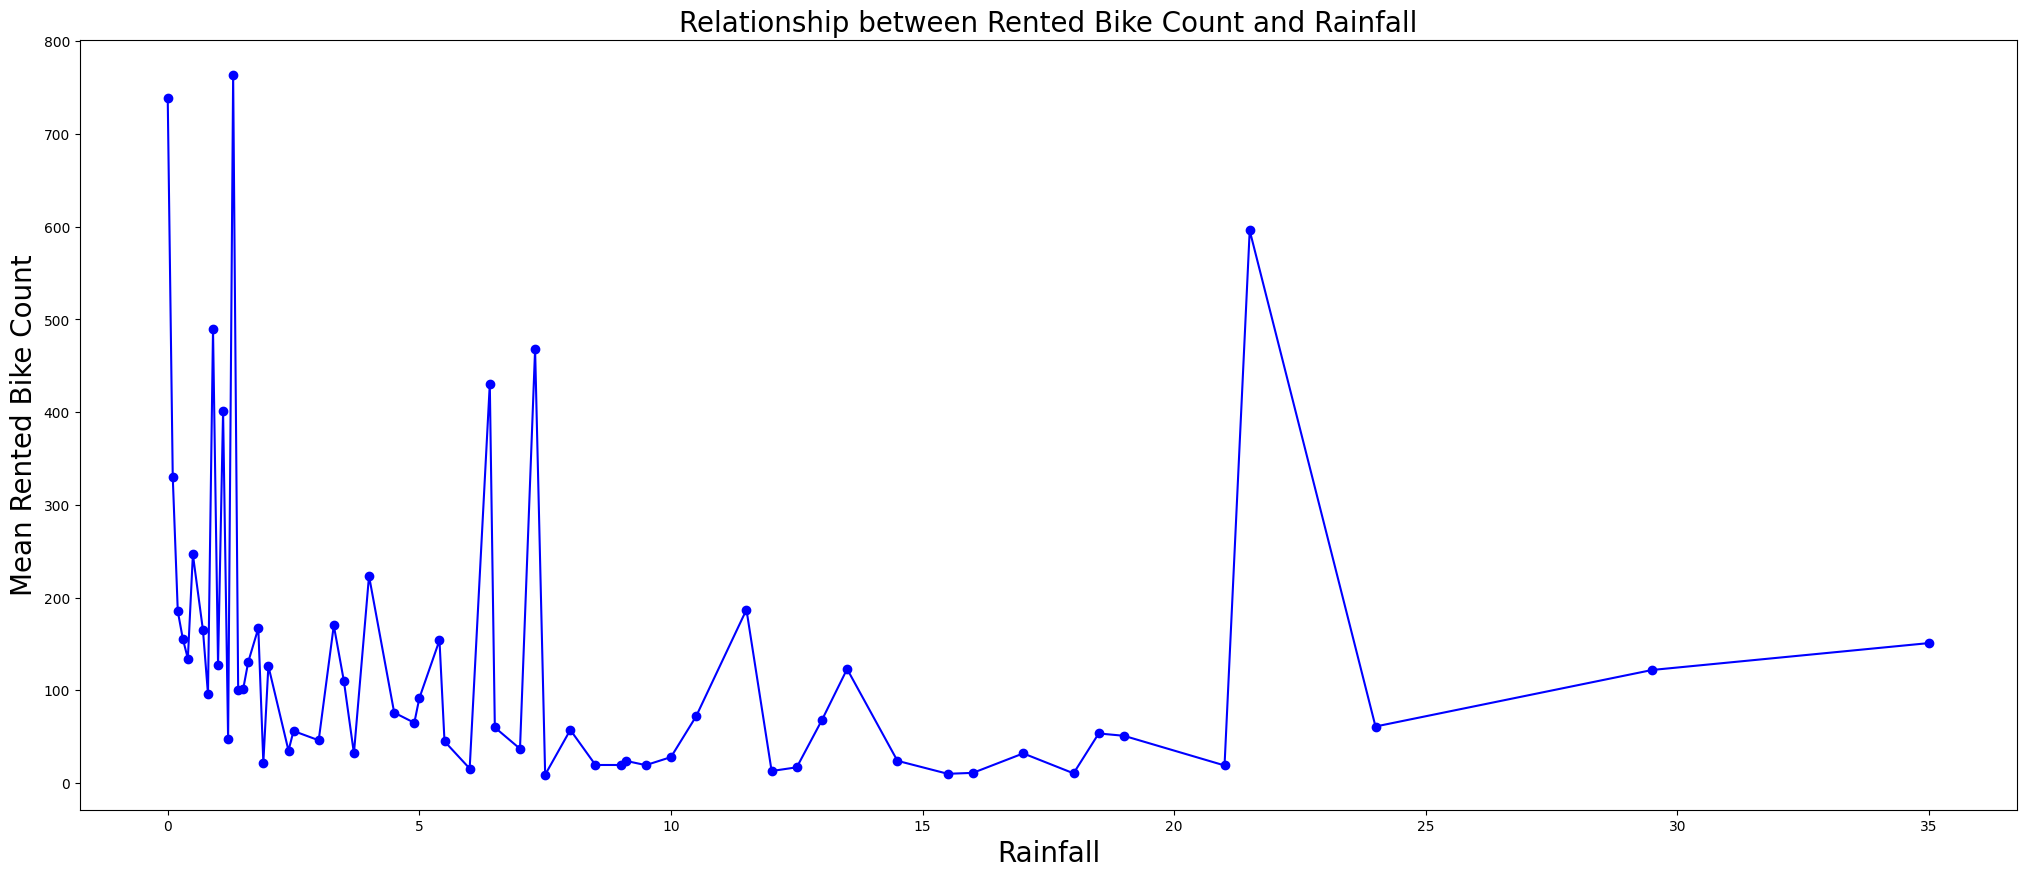

In [353]:
# Let's plot a graph inorder to understand Relationship between Rented Bike Count and Rainfall

plt.figure(figsize=(25,10))
data.groupby('Rainfall').mean()['Rented_Bike_Count'].plot(marker='o', linestyle='-', color='b')

plt.xlabel('Rainfall',fontsize=20)
plt.ylabel('Mean Rented Bike Count',fontsize=20)
plt.title('Relationship between Rented Bike Count and Rainfall',fontsize=20)

plt.show()


####Regression plot

* ***The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.***

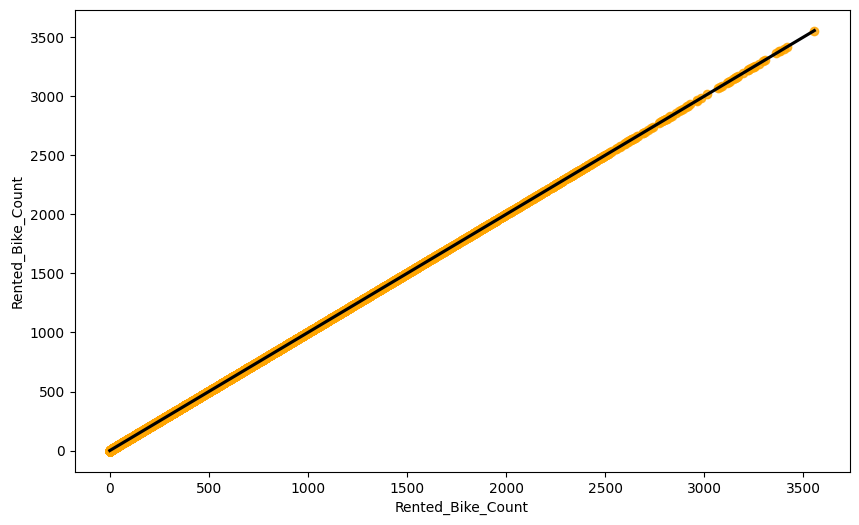

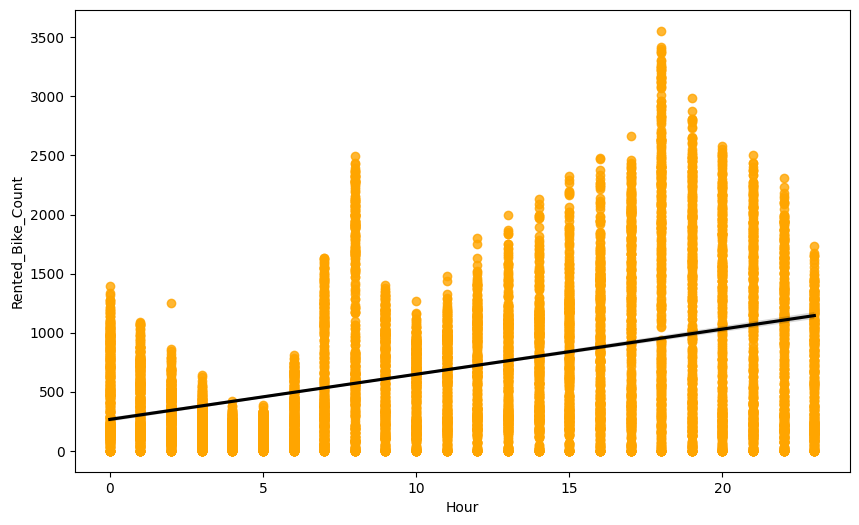

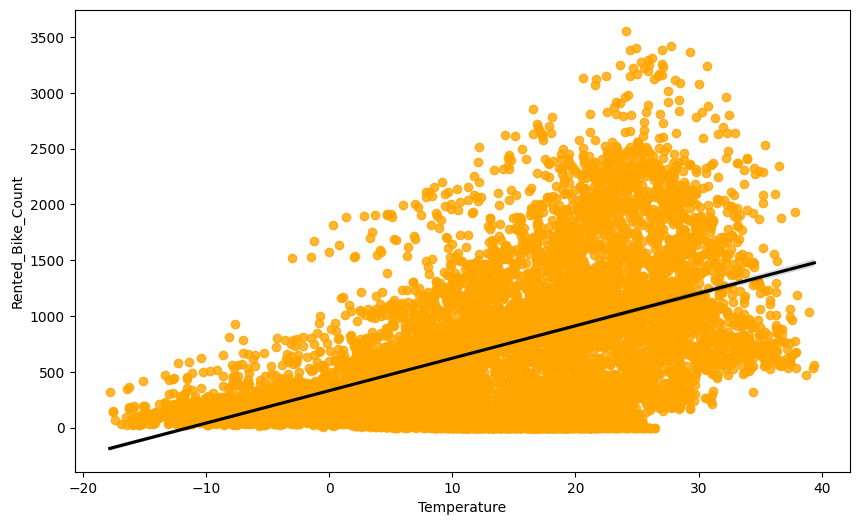

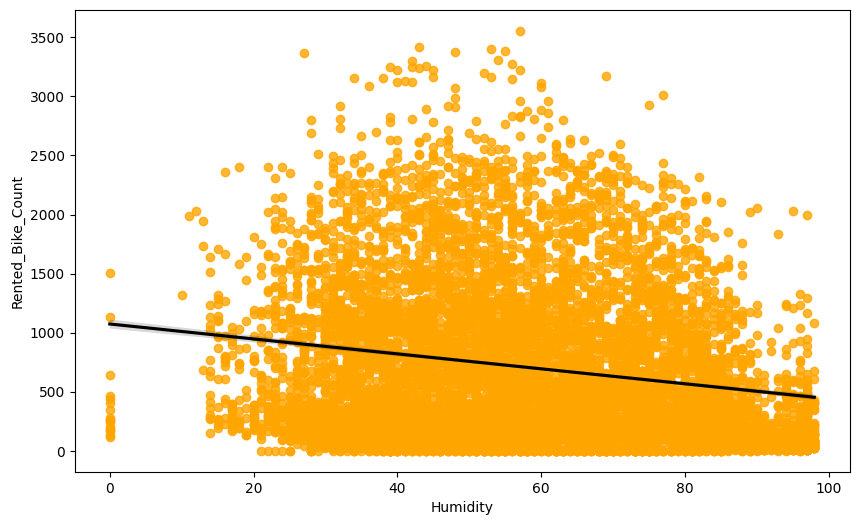

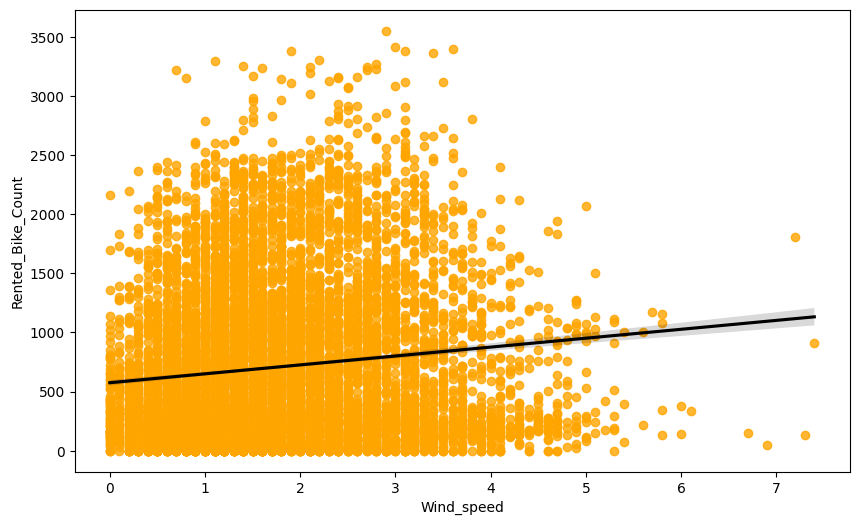

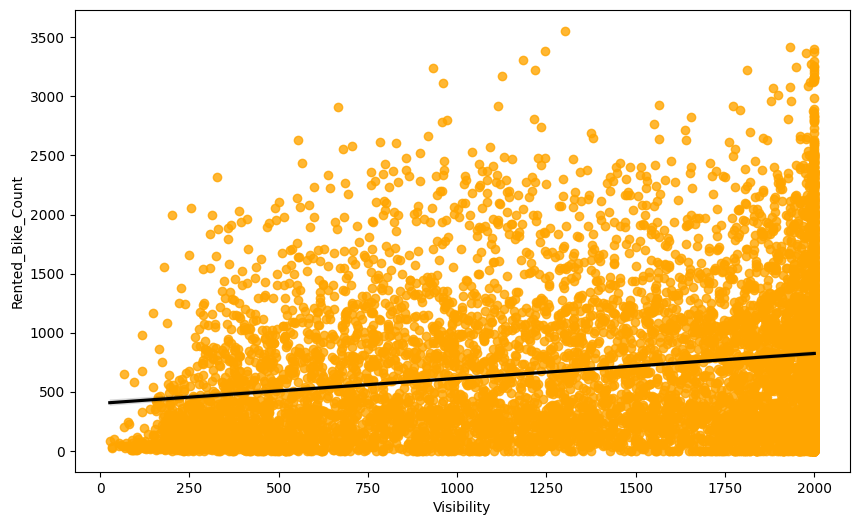

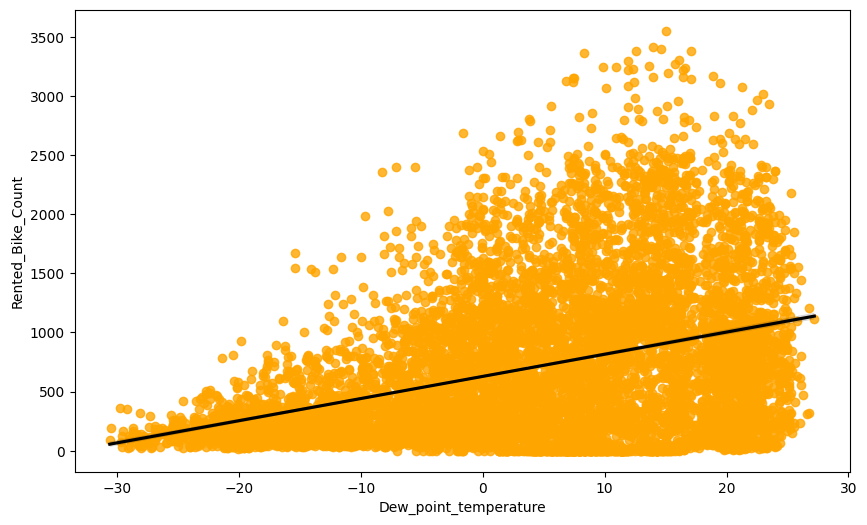

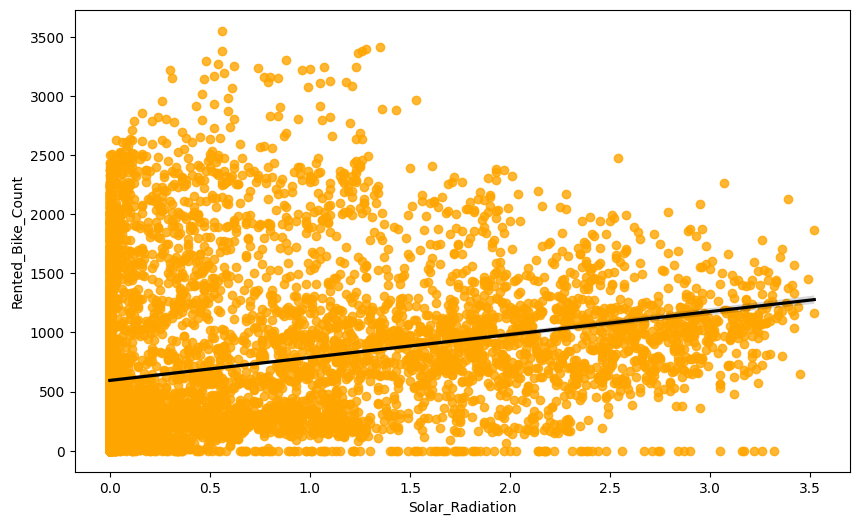

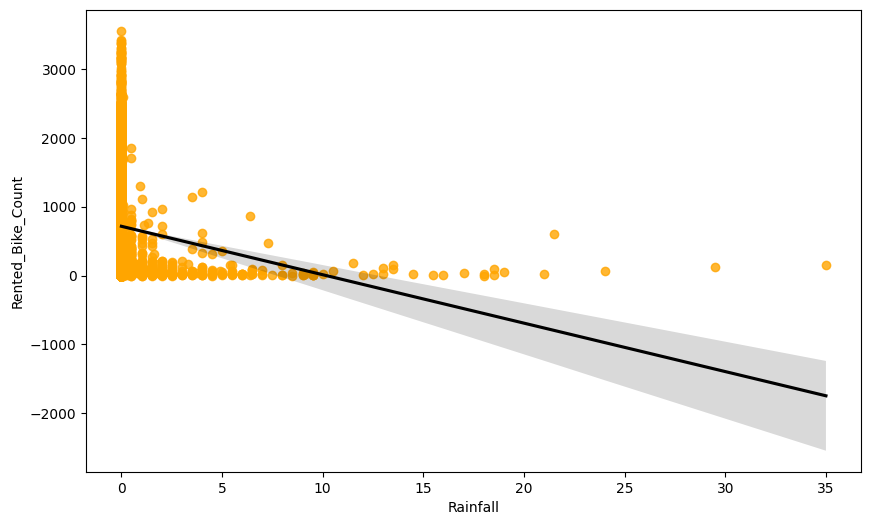

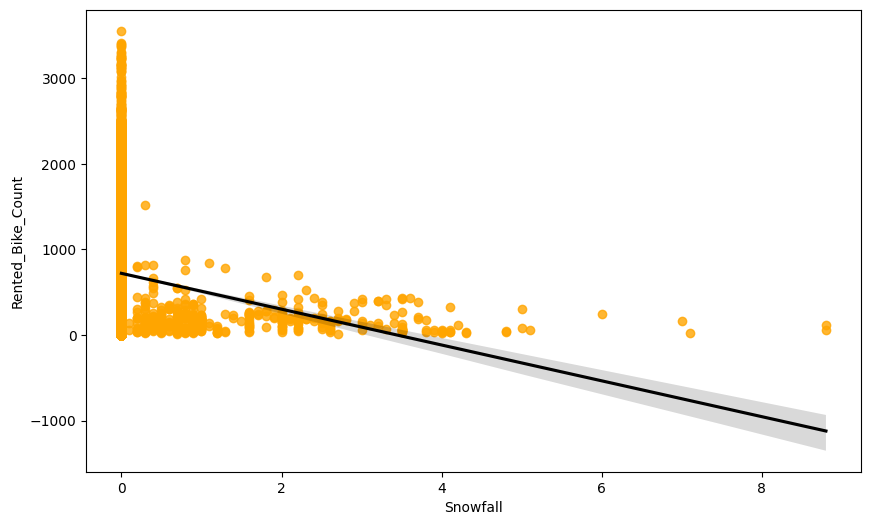

In [354]:
#printing the regression plot for all the numerical features
for col in num_dat:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=data[col],y=data['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

In [355]:
data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day',
       'date_year', 'date_months', 'date_day', 'weekdays_weekend',
       'Temperature_Bins'],
      dtype='object')

<Axes: >

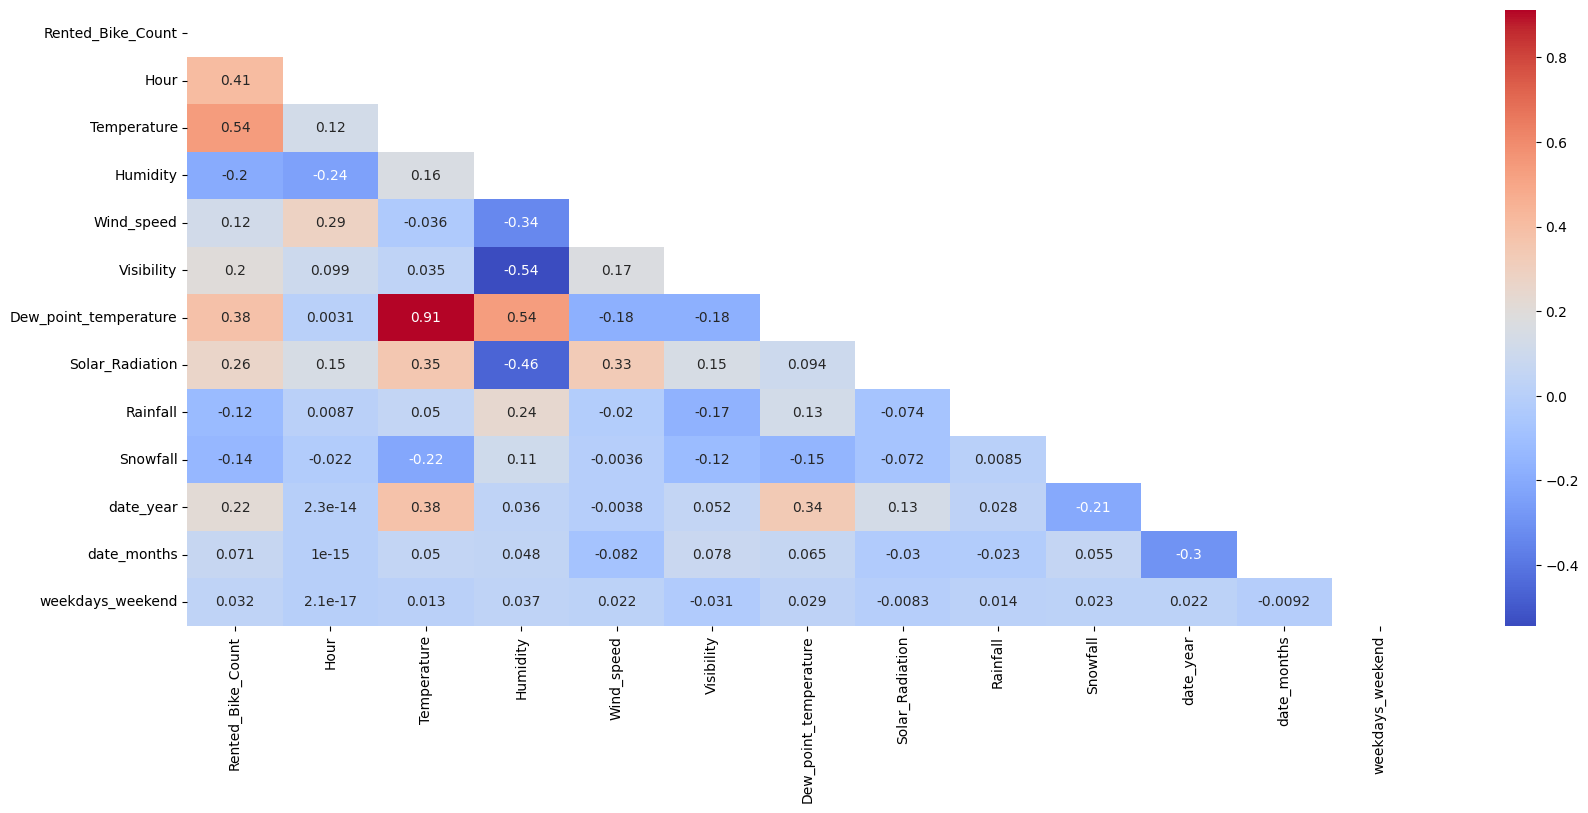

In [356]:
# Let's plot heatmap to see the correlation of feature to each other.
plt.figure(figsize=(20, 8))
correlation = data.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, cmap='coolwarm')

From the above heatmap we can clearly see temperature and Dew point temperature is highly correlated with each other, so we can drop from the our dataframe.

## Outlier Treatment

In [357]:
# Let's calculate max value of Rented Bike Count.
data['Rented_Bike_Count'].max()

3556

In [358]:
# Finding the boundary values
print("Highest allowed",data['Rented_Bike_Count'].mean() + 3*data['Rented_Bike_Count'].std())
print("Lowest allowed",data['Rented_Bike_Count'].mean() - 3*data['Rented_Bike_Count'].std())

Highest allowed 2639.5944580121673
Lowest allowed -1230.3903484231264


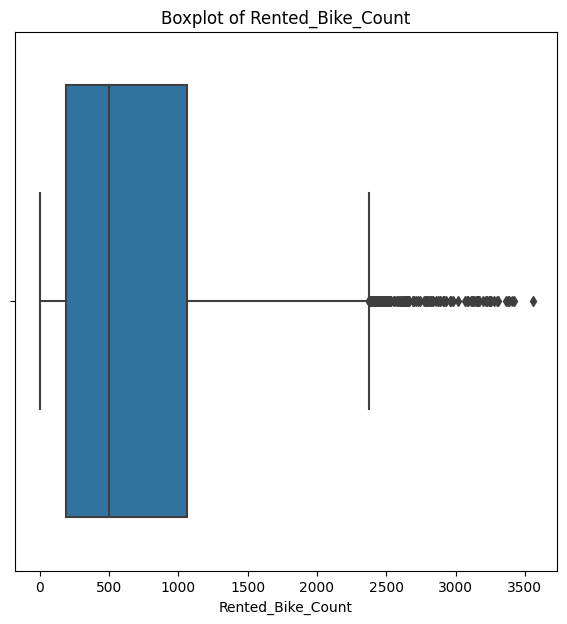

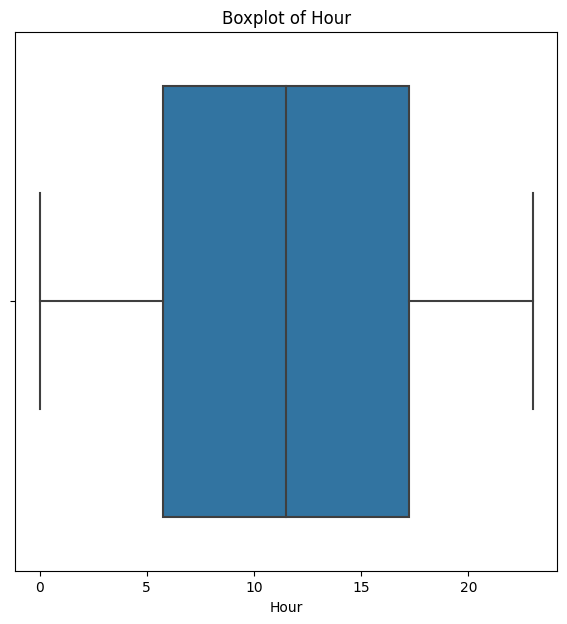

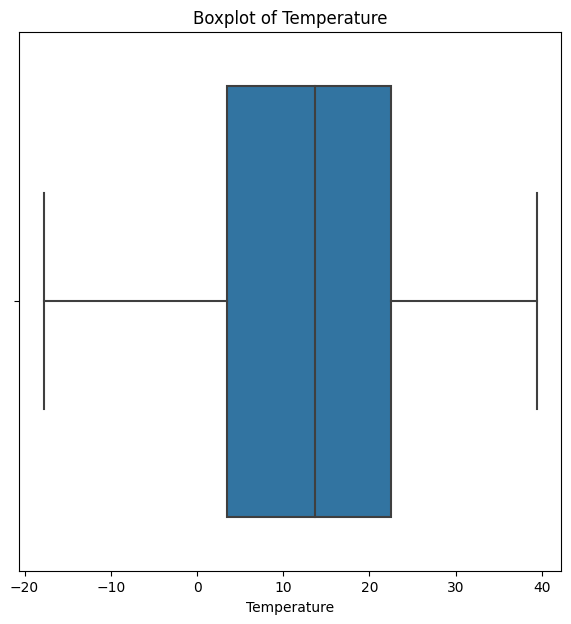

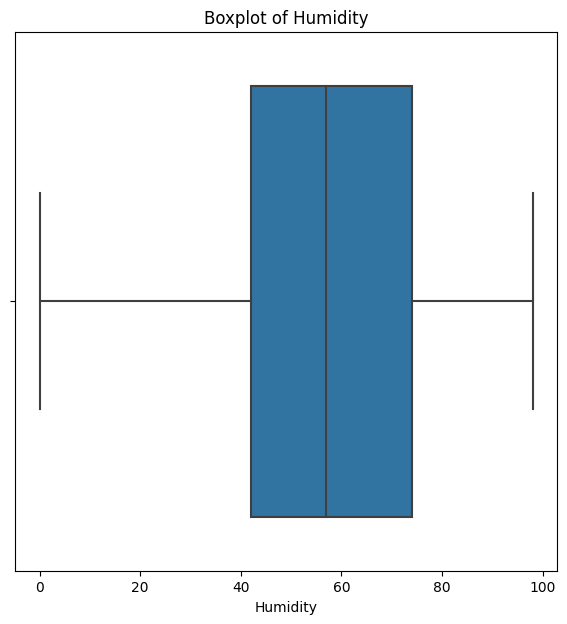

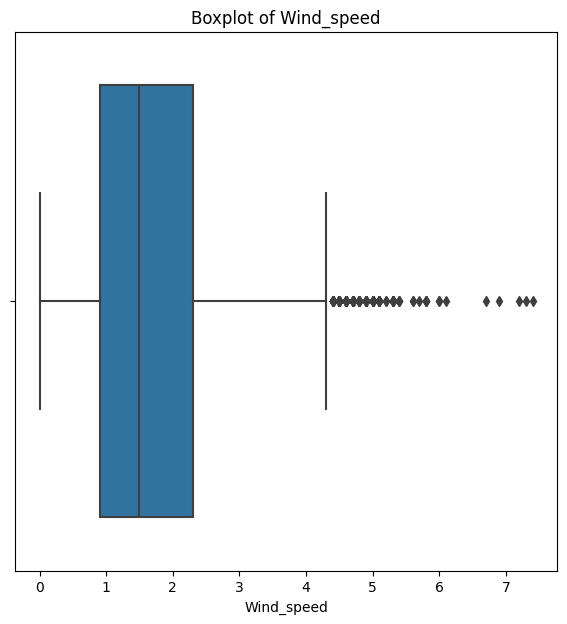

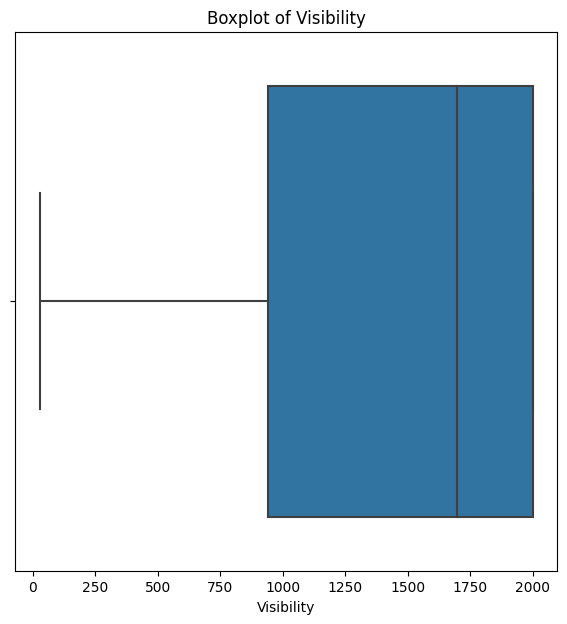

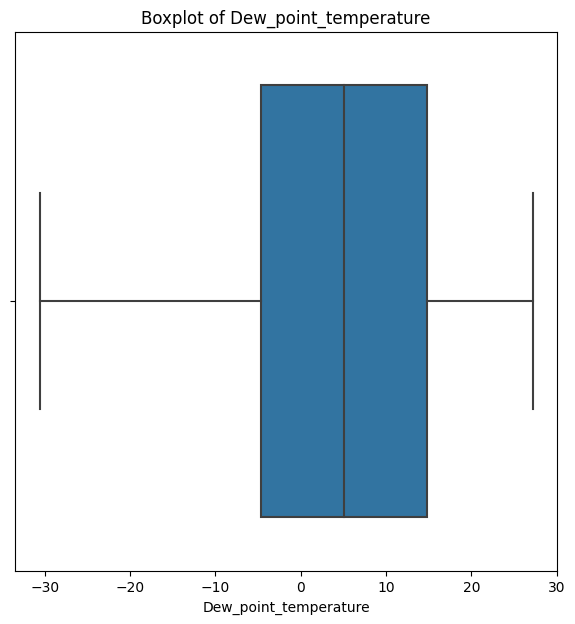

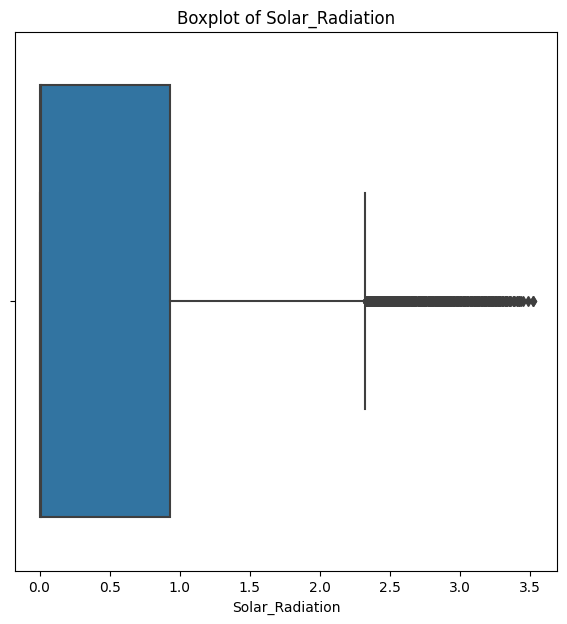

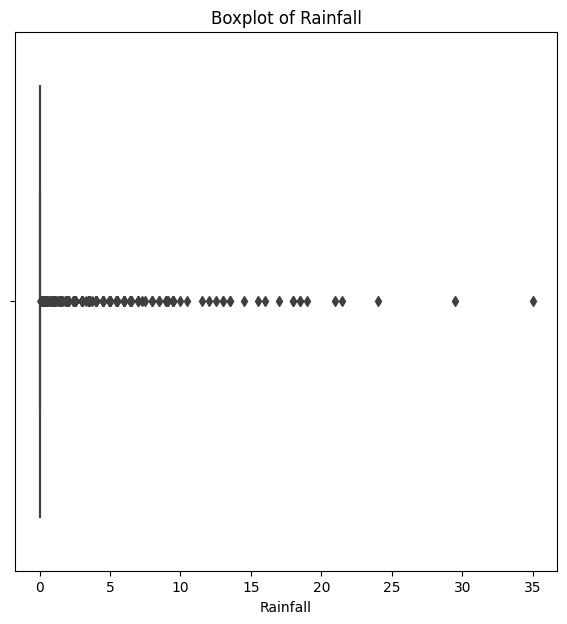

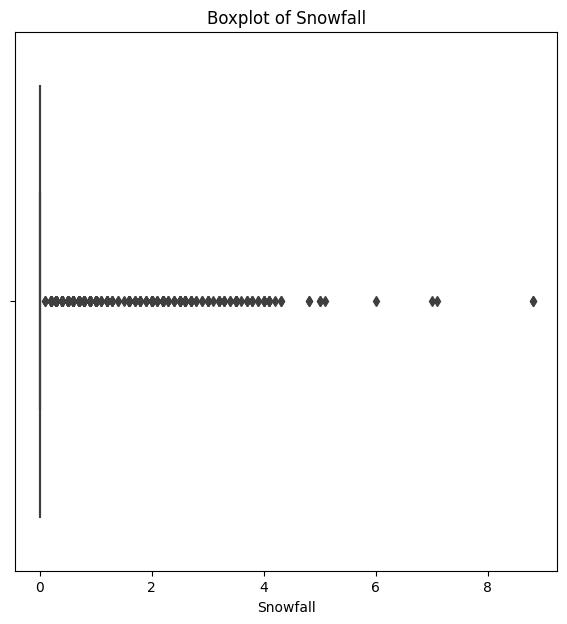

In [359]:
# Create separate boxplots for each column in 'num_dat'
for column in num_dat.columns:
    plt.figure(figsize=(7, 7))
    sns.boxplot(x=num_dat[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()


In [360]:

# Let's find outlier by appling filter feature
data[(data['Rented_Bike_Count'] > 2639.59)].head()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
3282 2018-04-16               2692    18         17.0        28         3.1   
3498 2018-04-25               2807    18         21.2        32         3.8   
3714 2018-04-05               2661    18         17.1        35         3.4   
3834 2018-09-05               3130    18         20.6        41         2.3   
3882 2018-11-05               2701    18         17.9        37         3.1   

      Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
3282        2000                   -1.6             0.88       0.0       0.0   
3498        1927                    3.8             0.94       0.0       0.0   
3714        1961                    1.4             1.11       0.0       0.0   
3834        2000                    6.8             1.10       0.0       0.0   
3882        1819                    2.9             0.36       0.0       0.0   

     Seasons     Holiday Functioning_Day  date_year  date_months   date_day  \
3282  Spring  No Holiday             Yes       2018            4     Monday   
3498  Spring  No Holiday             Yes       2018            4  Wednesday   
3714  Spring  No Holiday             Yes       2018            4   Thursday   
3834  Spring  No Holiday             Yes       2018            9  Wednesday   
3882  Spring  No Holiday             Yes       2018           11     Monday   

      weekdays_weekend Temperature_Bins  
3282                 1         (10, 20]  
3498                 1         (20, 30]  
3714                 1         (10, 20]  
3834                 1         (20, 30]  
3882                 1         (10, 20]

In [361]:
# Let's find number of row and columns from this filtered data

filtered_data = data[data['Rented_Bike_Count'] > 2639.59]
num_rows = filtered_data.shape[0]
num_columns = filtered_data.shape[1]
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 67
Number of columns: 19


In [362]:
filtered_data.shape[0]/data.shape[0]*100

0.7648401826484018

# **Capping**

In [363]:
upper_limit = data['Rented_Bike_Count'].mean() + 3*data['Rented_Bike_Count'].std()
lower_limit = data['Rented_Bike_Count'].mean() - 3*data['Rented_Bike_Count'].std()

In [364]:
print(upper_limit)

2639.5944580121673


In [365]:
# Let's create a function for treating outlier.

data['Rented_Bike_Count'] = np.where(
    data['Rented_Bike_Count']>upper_limit,
    upper_limit,
    np.where(
        data['Rented_Bike_Count']<lower_limit,
        lower_limit,
        data['Rented_Bike_Count']
    )
)

<Axes: xlabel='Rented_Bike_Count'>

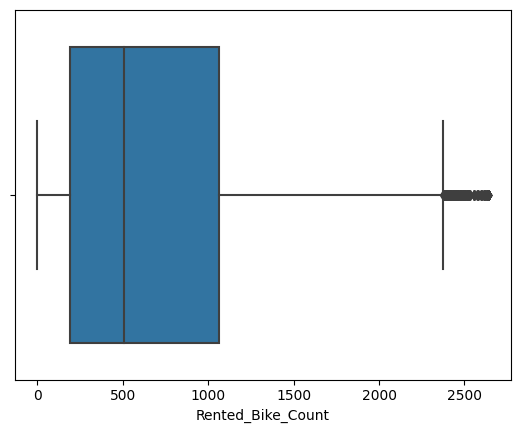

In [366]:
sns.boxplot(x=data['Rented_Bike_Count'])

In [367]:
# Let's store this filtered data new vairable 
new_data=data[(data['Rented_Bike_Count'] < 2639.59)]

<Axes: xlabel='Rented_Bike_Count', ylabel='Density'>

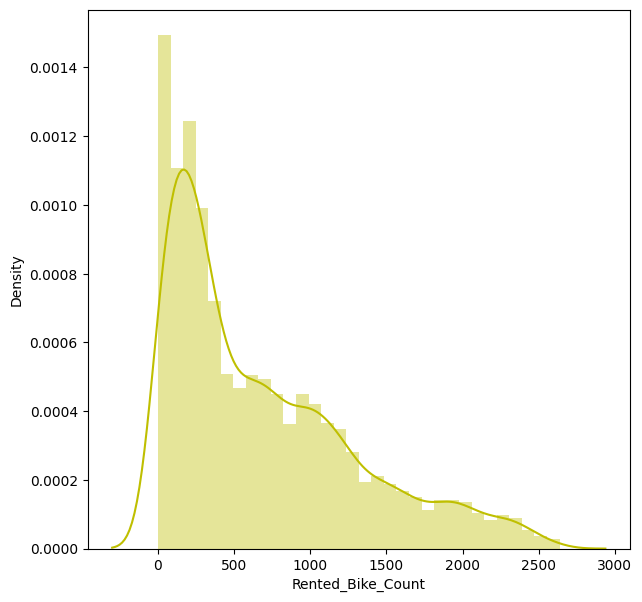

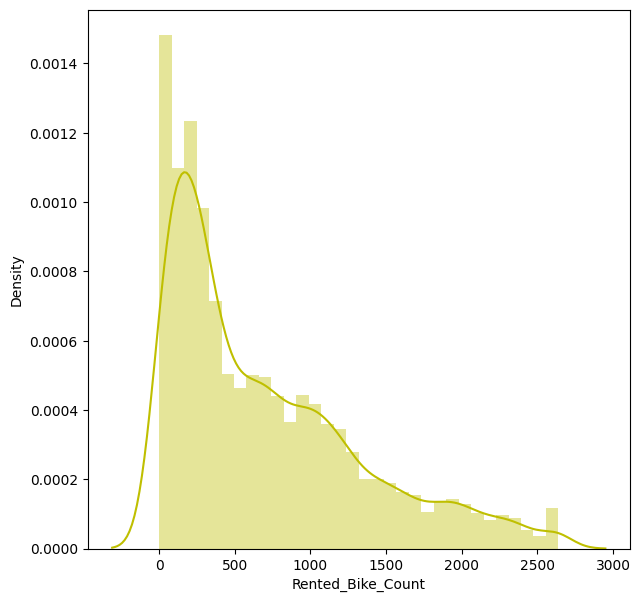

In [368]:
# Dependent new data variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(new_data['Rented_Bike_Count'],color="y")

# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(data['Rented_Bike_Count'],color="y")

<Axes: xlabel='Rented_Bike_Count', ylabel='Density'>

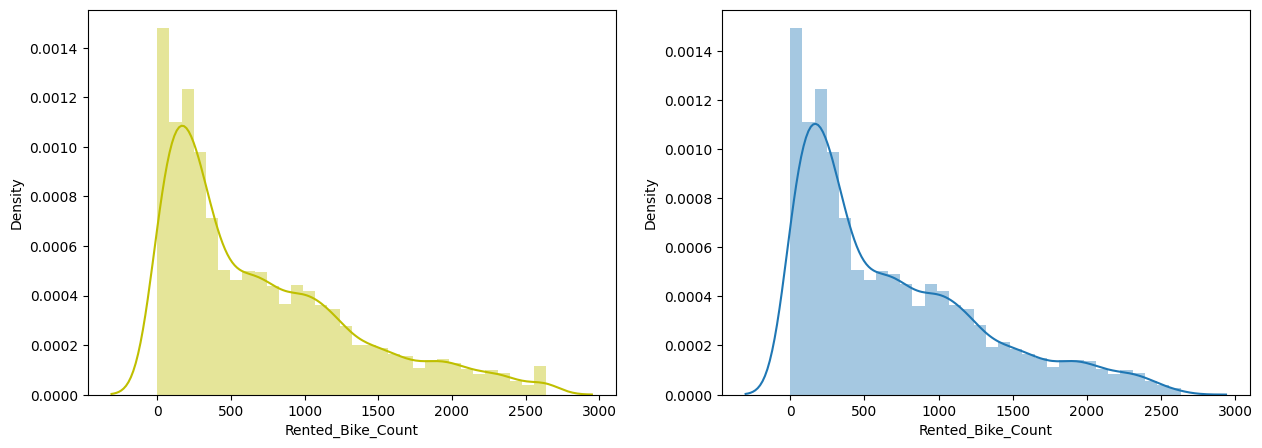

In [369]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(data['Rented_Bike_Count'], ax=axes[0],color="y")

sns.distplot(new_data['Rented_Bike_Count'], ax=axes[1])


In [370]:
# Let's find out skewness of our Rented Bike Count feature 
data['Rented_Bike_Count'].skew()

1.0638389315694605

In [371]:
# Let's find out skewness of new data our Rented Bike Count feature 
new_data['Rented_Bike_Count'].skew()

1.0163053839957654

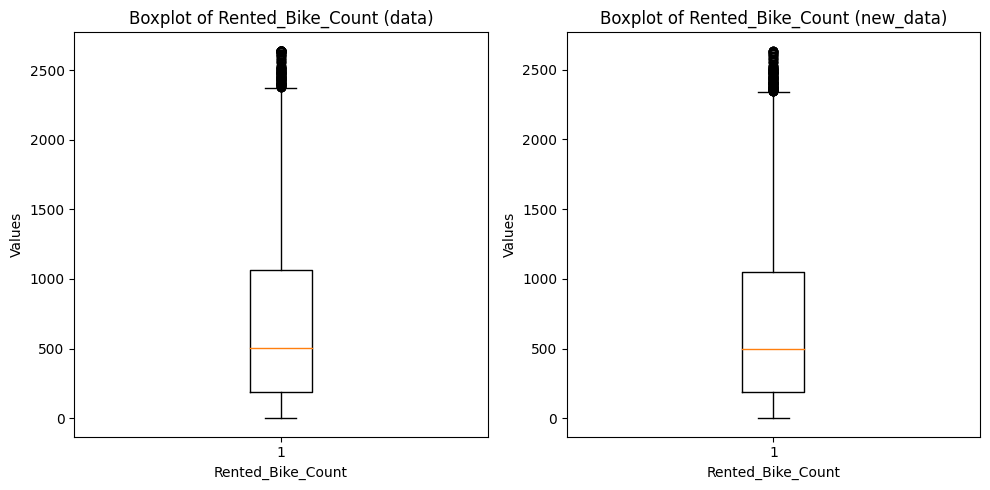

In [372]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# First subplot - boxplot of new_data
axes[0].boxplot(data['Rented_Bike_Count'])
axes[0].set_xlabel('Rented_Bike_Count')
axes[0].set_ylabel('Values')
axes[0].set_title('Boxplot of Rented_Bike_Count (data)')

# Second subplot - boxplot of data
axes[1].boxplot(new_data['Rented_Bike_Count'])
axes[1].set_xlabel('Rented_Bike_Count')
axes[1].set_ylabel('Values')
axes[1].set_title('Boxplot of Rented_Bike_Count (new_data)')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


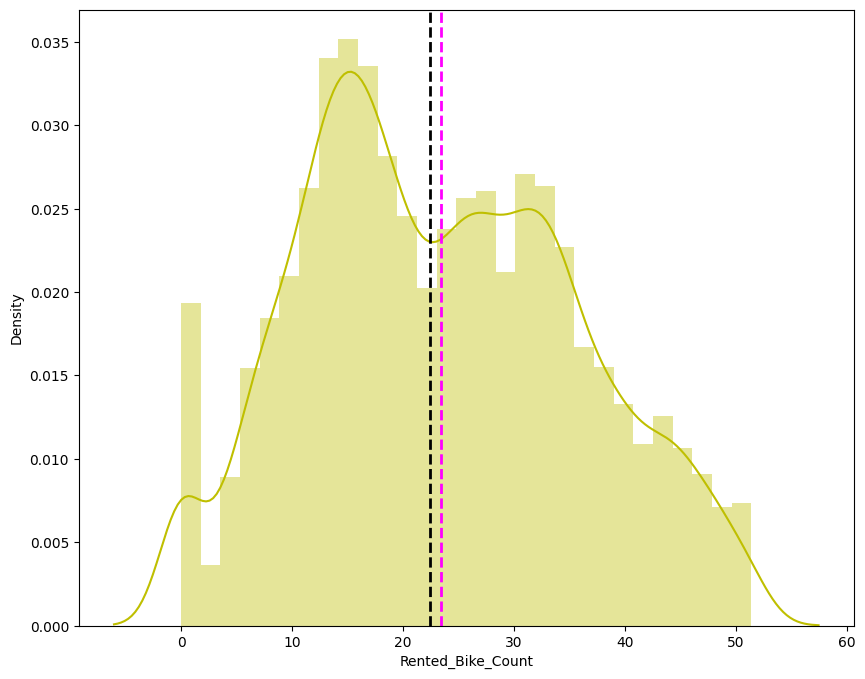

In [373]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(data['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(data['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(data['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

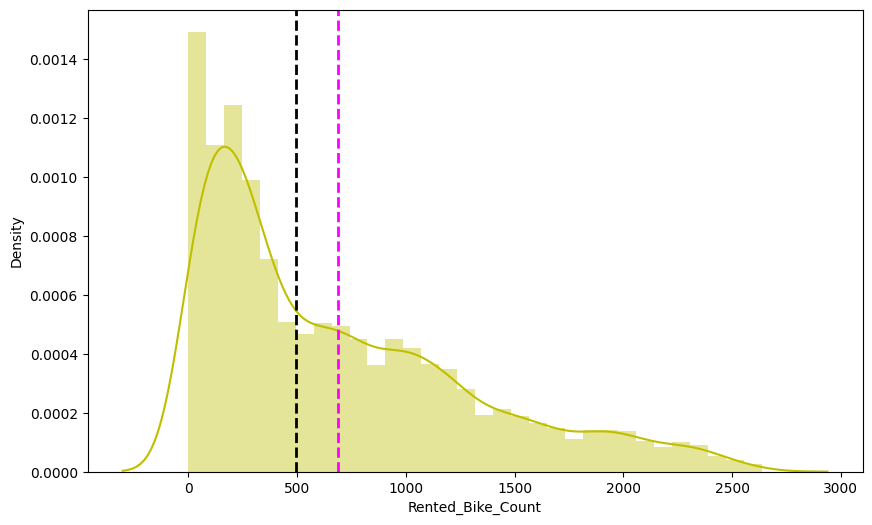

In [374]:

#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(new_data['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(new_data['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(new_data['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

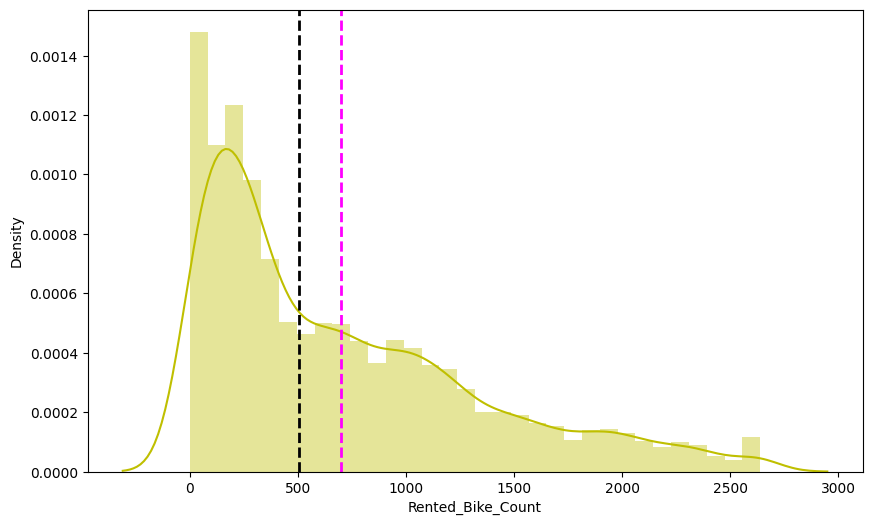

In [375]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(data['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(data['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(data['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

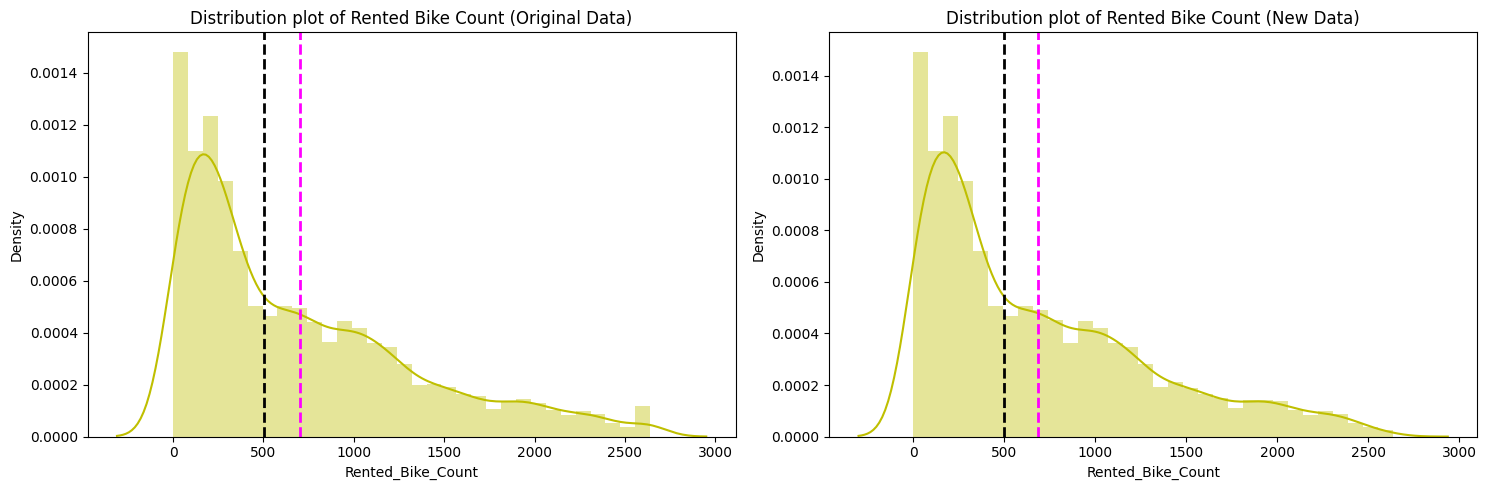

In [376]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].set_xlabel('Rented_Bike_Count')
axes[0].set_ylabel('Density')
sns.distplot(data['Rented_Bike_Count'], ax=axes[0], color="y")
axes[0].axvline(data['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
axes[0].axvline(data['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
axes[0].set_title('Distribution plot of Rented Bike Count (Original Data)')

axes[1].set_xlabel('Rented_Bike_Count')
axes[1].set_ylabel('Density')
sns.distplot(new_data['Rented_Bike_Count'], ax=axes[1], color="y")
axes[1].axvline(new_data['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
axes[1].axvline(new_data['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
axes[1].set_title('Distribution plot of Rented Bike Count (New Data)')

plt.tight_layout()
plt.show()

In [377]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8693 non-null   datetime64[ns]
 1   Rented_Bike_Count      8693 non-null   float64       
 2   Hour                   8693 non-null   int64         
 3   Temperature            8693 non-null   float64       
 4   Humidity               8693 non-null   int64         
 5   Wind_speed             8693 non-null   float64       
 6   Visibility             8693 non-null   int64         
 7   Dew_point_temperature  8693 non-null   float64       
 8   Solar_Radiation        8693 non-null   float64       
 9   Rainfall               8693 non-null   float64       
 10  Snowfall               8693 non-null   float64       
 11  Seasons                8693 non-null   object        
 12  Holiday                8693 non-null   object        
 13  Fun

In [378]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   float64       
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [379]:
# Let's visualize Pair Plot visualization code

# sns.pairplot(data ,corner=True)
# plt.legend()

In [380]:
# 
data[data['Rented_Bike_Count']==0]

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
3144 2018-11-04                0.0     0         14.4        82         4.6   
3145 2018-11-04                0.0     1         13.6        81         3.6   
3146 2018-11-04                0.0     2         12.7        80         3.9   
3147 2018-11-04                0.0     3         11.6        81         3.1   
3148 2018-11-04                0.0     4         10.2        83         3.5   
...         ...                ...   ...          ...       ...         ...   
8251 2018-09-11                0.0    19         11.9        71         2.7   
8252 2018-09-11                0.0    20         11.9        72         2.5   
8253 2018-09-11                0.0    21         11.4        74         1.9   
8254 2018-09-11                0.0    22         11.2        75         1.7   
8255 2018-09-11                0.0    23         10.9        76         1.2   

      Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
3144        1041                   11.3              0.0       0.0       0.0   
3145         886                   10.3              0.0       0.0       0.0   
3146         885                    9.3              0.0       0.0       0.0   
3147         687                    8.4              0.0       0.0       0.0   
3148         554                    7.4              0.0       0.0       0.0   
...          ...                    ...              ...       ...       ...   
8251         589                    6.7              0.0       0.0       0.0   
8252         526                    7.0              0.0       0.0       0.0   
8253         498                    6.9              0.0       0.0       0.0   
8254         478                    6.9              0.0       0.0       0.0   
8255         456                    6.8              0.0       0.0       0.0   

     Seasons     Holiday Functioning_Day  date_year  date_months date_day  \
3144  Spring  No Holiday              No       2018           11   Sunday   
3145  Spring  No Holiday              No       2018           11   Sunday   
3146  Spring  No Holiday              No       2018           11   Sunday   
3147  Spring  No Holiday              No       2018           11   Sunday   
3148  Spring  No Holiday              No       2018           11   Sunday   
...      ...         ...             ...        ...          ...      ...   
8251  Autumn  No Holiday              No       2018            9  Tuesday   
8252  Autumn  No Holiday              No       2018            9  Tuesday   
8253  Autumn  No Holiday              No       2018            9  Tuesday   
8254  Autumn  No Holiday              No       2018            9  Tuesday   
8255  Autumn  No Holiday              No       2018            9  Tuesday   

      weekdays_weekend Temperature_Bins  
3144                 0         (10, 20]  
3145                 0         (10, 20]  
3146                 0         (10, 20]  
3147                 0         (10, 20]  
3148                 0         (10, 20]  
...                ...              ...  
8251                 1         (10, 20]  
8252                 1         (10, 20]  
8253                 1         (10, 20]  
8254                 1         (10, 20]  
8255                 1         (10, 20]  

[295 rows x 19 columns]

In [381]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   float64       
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [382]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8693 non-null   datetime64[ns]
 1   Rented_Bike_Count      8693 non-null   float64       
 2   Hour                   8693 non-null   int64         
 3   Temperature            8693 non-null   float64       
 4   Humidity               8693 non-null   int64         
 5   Wind_speed             8693 non-null   float64       
 6   Visibility             8693 non-null   int64         
 7   Dew_point_temperature  8693 non-null   float64       
 8   Solar_Radiation        8693 non-null   float64       
 9   Rainfall               8693 non-null   float64       
 10  Snowfall               8693 non-null   float64       
 11  Seasons                8693 non-null   object        
 12  Holiday                8693 non-null   object        
 13  Fun

In [383]:
data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day',
       'date_year', 'date_months', 'date_day', 'weekdays_weekend',
       'Temperature_Bins'],
      dtype='object')

In [384]:
data.sample(5)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
5235 2018-07-07              545.0     3         20.4        59         1.0   
66   2017-03-12              443.0    18          6.0        84         1.9   
2493 2018-03-14             1181.0    21         16.8        67         2.0   
352  2017-12-15              354.0    16          0.0        37         0.6   
775  2018-02-01              344.0     7         -3.2        69         0.5   

      Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
5235        2000                   12.1             0.00       0.0       0.0   
66           327                    3.4             0.00       0.0       0.0   
2493        1775                   10.6             0.00       0.0       0.0   
352          994                  -12.9             0.13       0.0       0.0   
775         1249                   -8.0             0.00       0.0       0.0   

     Seasons     Holiday Functioning_Day  date_year  date_months   date_day  \
5235  Summer  No Holiday             Yes       2018            7   Saturday   
66    Winter  No Holiday             Yes       2017            3     Sunday   
2493  Spring  No Holiday             Yes       2018            3  Wednesday   
352   Winter  No Holiday             Yes       2017           12     Friday   
775   Winter  No Holiday             Yes       2018            2   Thursday   

      weekdays_weekend Temperature_Bins  
5235                 0         (20, 30]  
66                   0          (0, 10]  
2493                 1         (10, 20]  
352                  1         (-10, 0]  
775                  1         (-10, 0]

<Axes: >

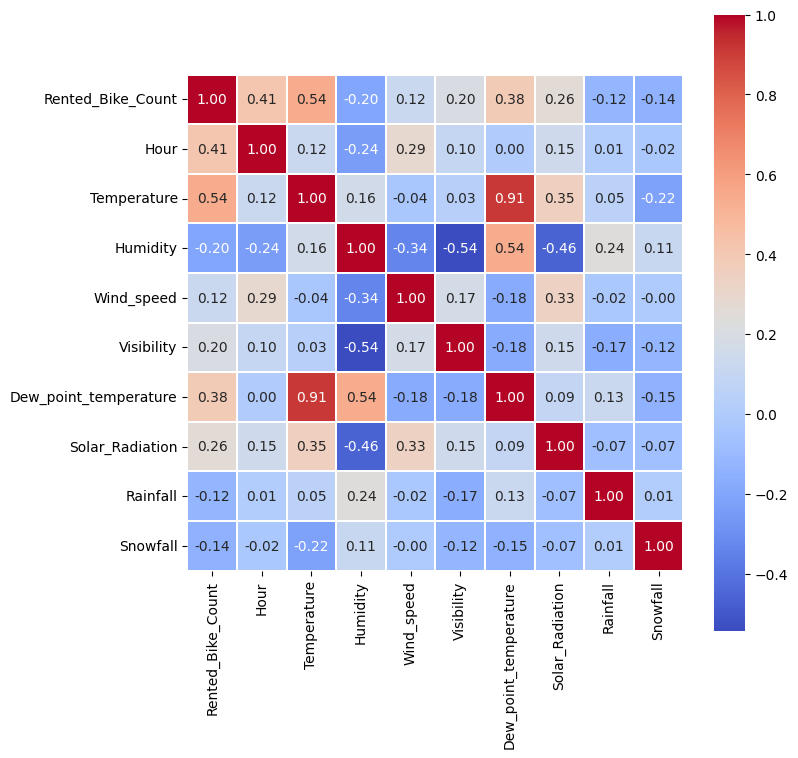

In [385]:
# Let's have look on heatmap inorder to see the correlation between each other features.
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(num_dat.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', cmap='coolwarm', square=True)

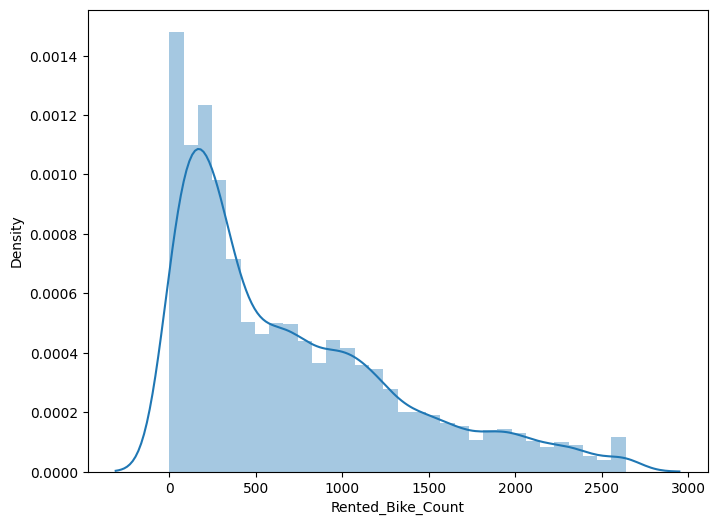

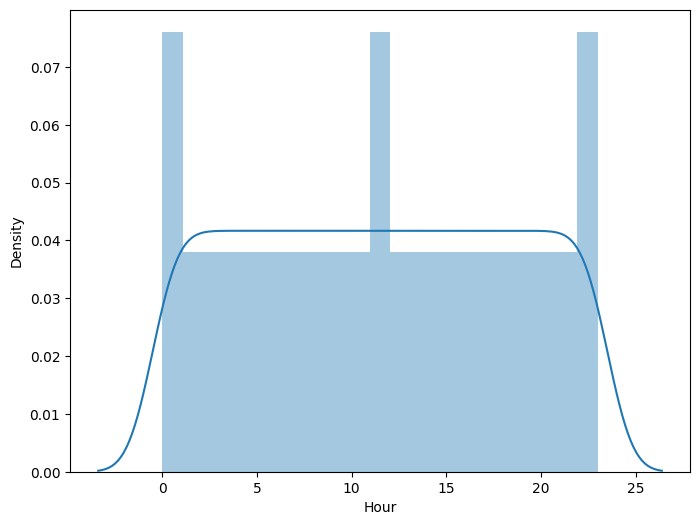

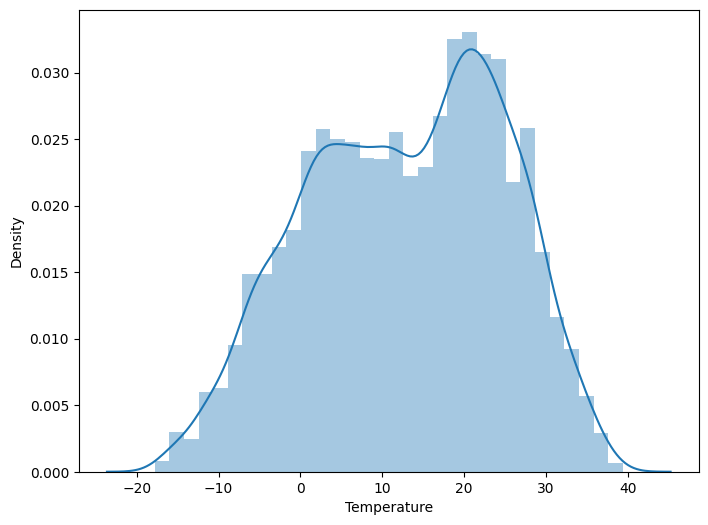

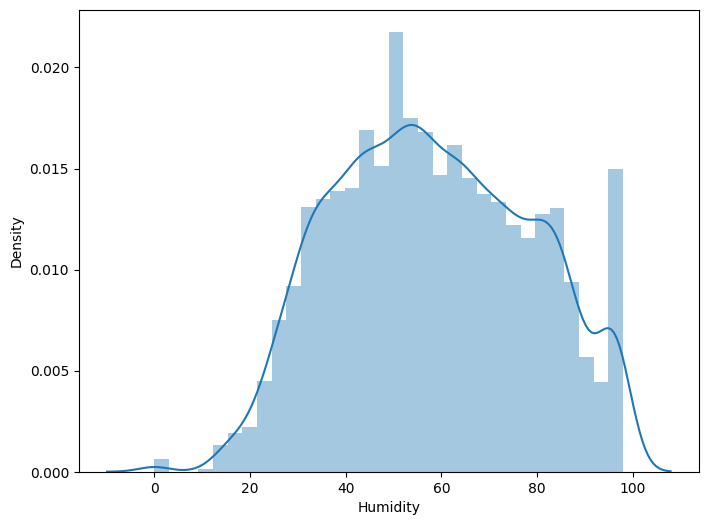

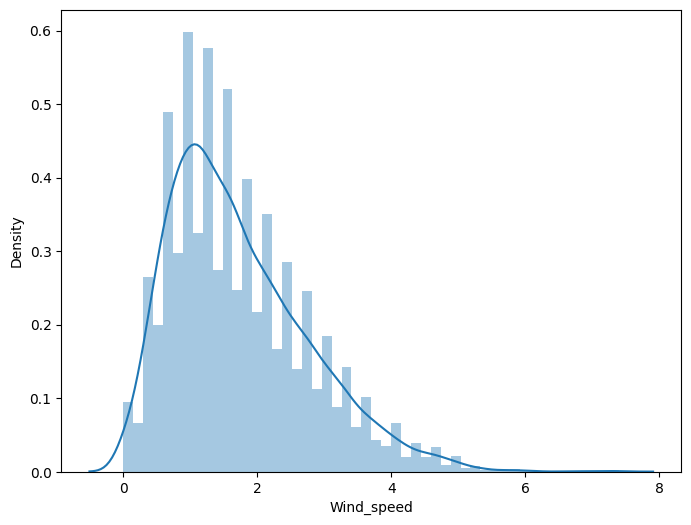

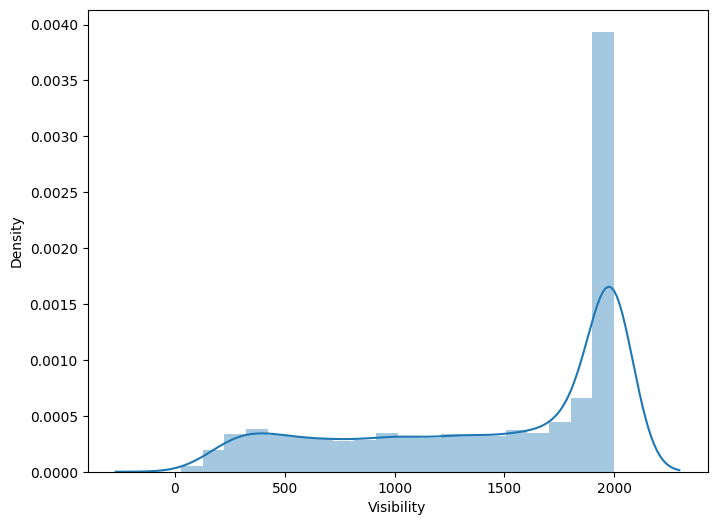

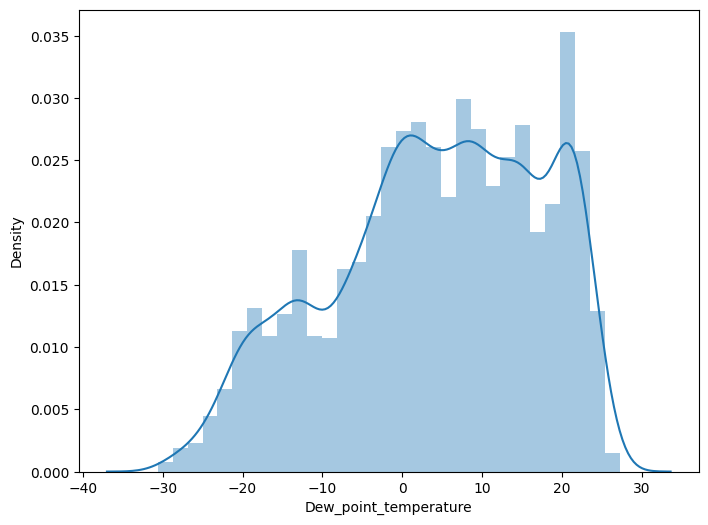

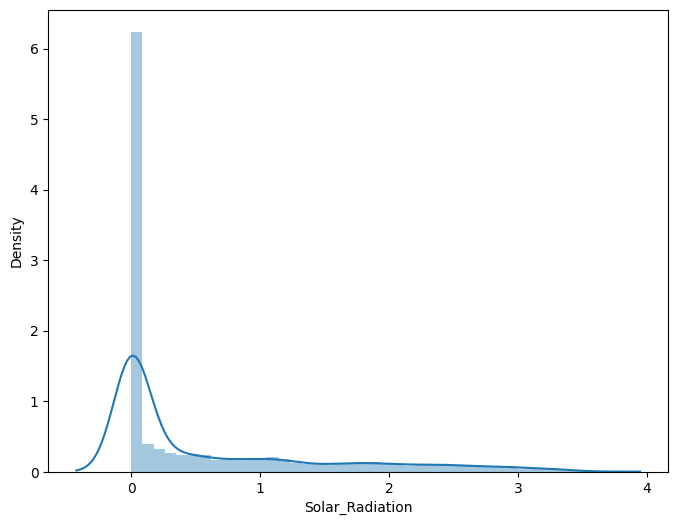

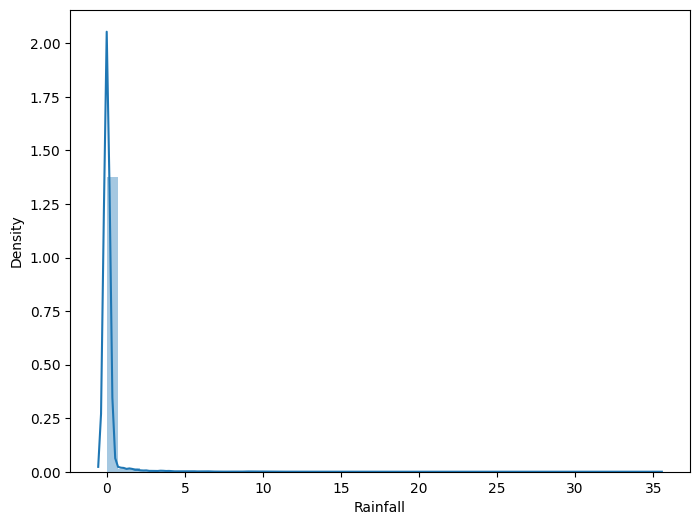

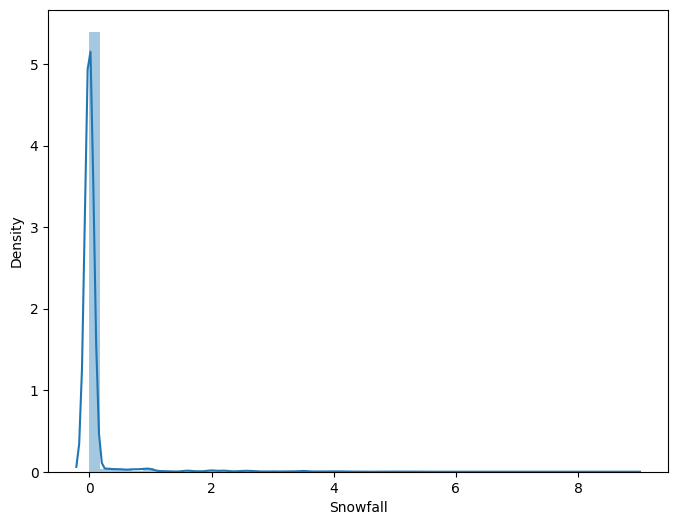

In [386]:
# Let's plot a graph distplot of all graph by using if else condition.

for col in num_dat:
  plt.figure(figsize=(8,6))
  sns.distplot(x=data[col])
  plt.xlabel(col)
plt.show()  

#**Q-Q chart**

In [387]:
# Let's plot Q-Q plot to see our data 

from scipy import stats

def diagnostic_plots(new_data,variable):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  new_data[variable].hist()
  plt.subplot(1,2,2)

  stats.probplot(new_data[variable],dist ='norm', plot=plt)
  plt.show()

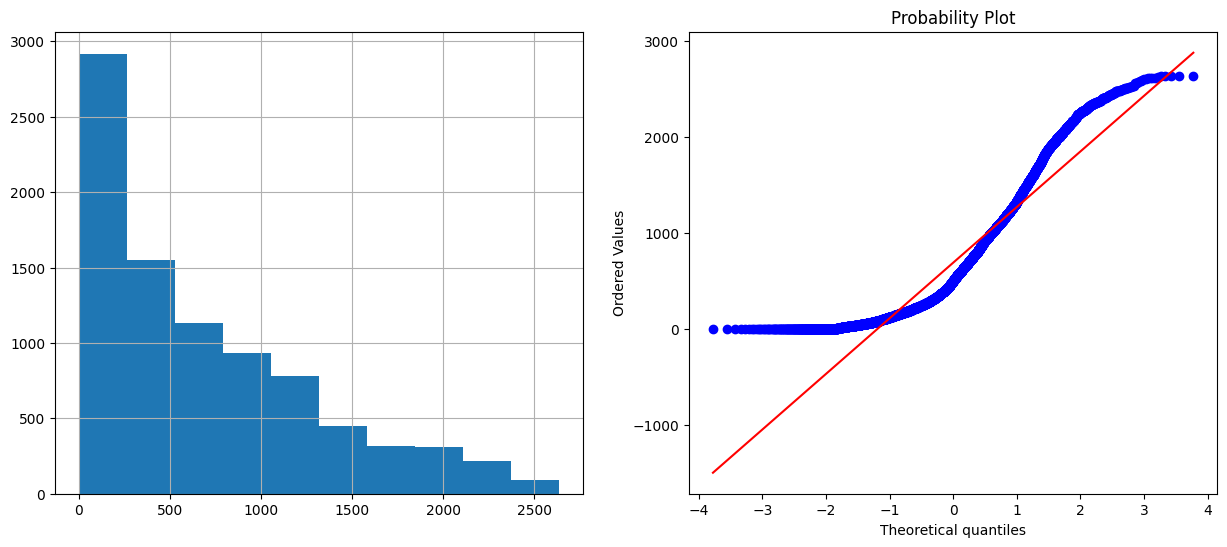

In [388]:
# Let's plot a graph diagnostic plot for Rented Bike Count 
diagnostic_plots(new_data,'Rented_Bike_Count')

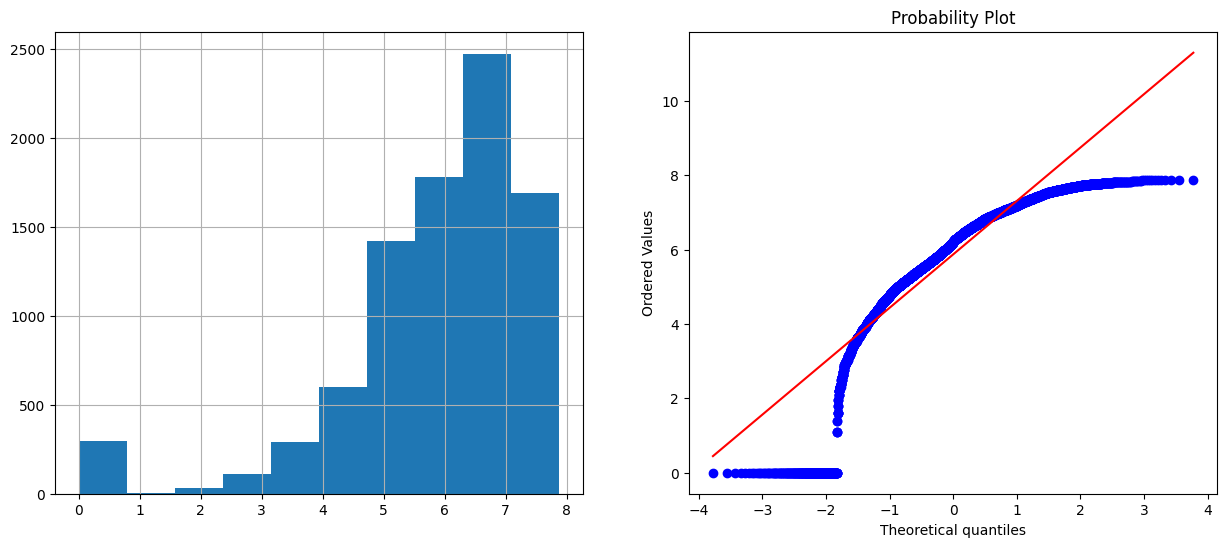

In [389]:
# Logarithmic Transformation
new_data['Log_Rented_Bike_Count']=np.log(new_data['Rented_Bike_Count']+1)

diagnostic_plots(new_data,'Log_Rented_Bike_Count')

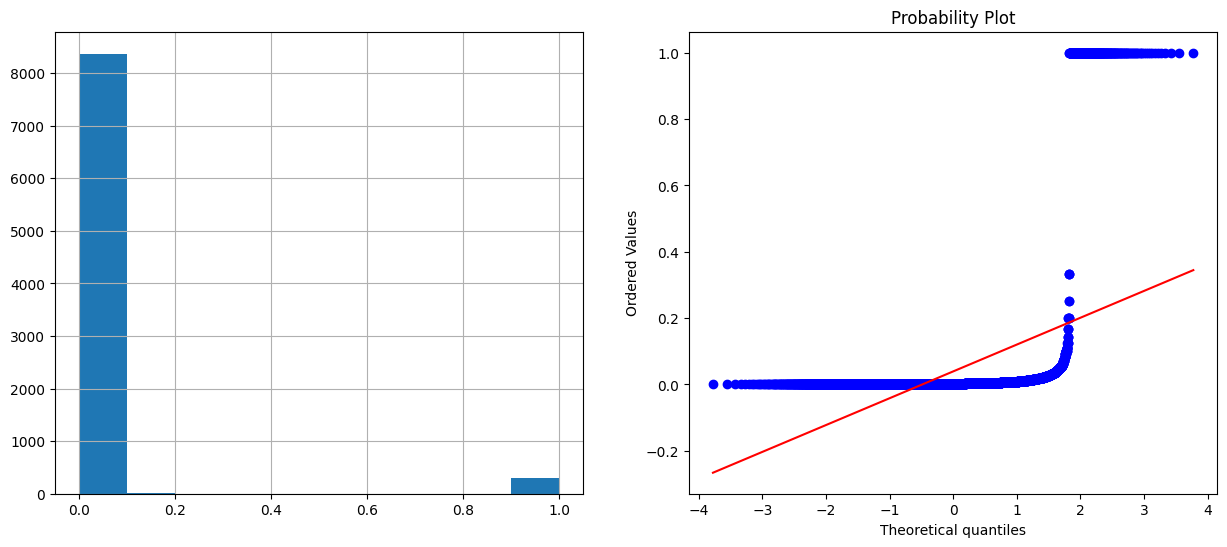

In [390]:
# reciprocal transformation
new_data['Rec_Rented_Bike_Count']=1/(new_data['Rented_Bike_Count']+1)
diagnostic_plots(new_data,'Rec_Rented_Bike_Count')

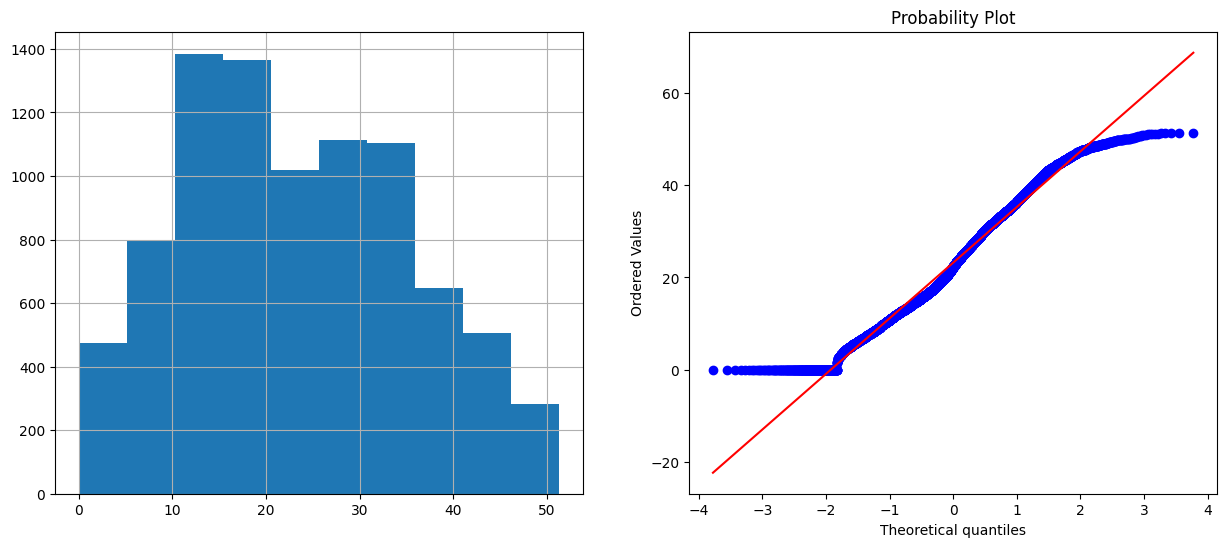

In [391]:
# Sqaure Root Tansformation
new_data['sqr_Rented_Bike_Count']=new_data['Rented_Bike_Count']**(1/2)
diagnostic_plots(new_data,'sqr_Rented_Bike_Count')

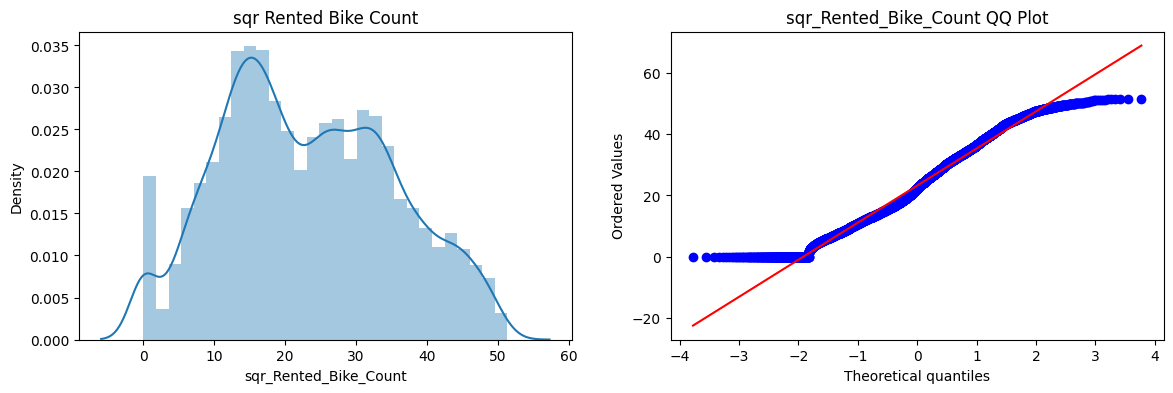

In [392]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(new_data['sqr_Rented_Bike_Count'])
plt.title('sqr Rented Bike Count')

plt.subplot(122)
stats.probplot(new_data['sqr_Rented_Bike_Count'], dist="norm", plot=plt)
plt.title('sqr_Rented_Bike_Count QQ Plot')

plt.show()

In [393]:
new_data['sqr_Rented_Bike_Count'].skew()

0.18247454029420096

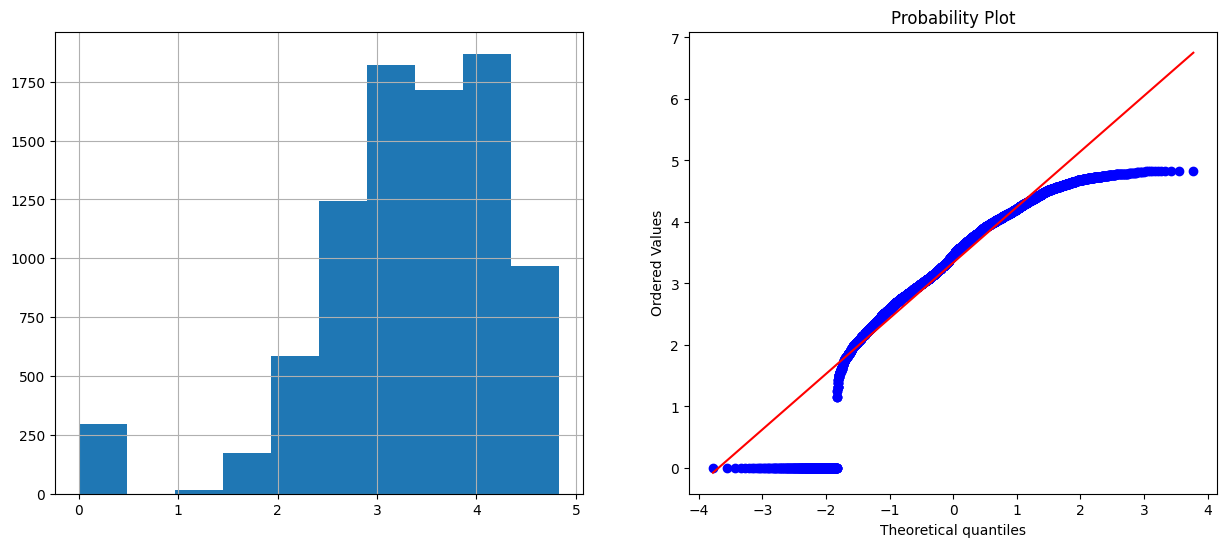

In [394]:
# exponential Tanformation
new_data['Exp_Rented_Bike_Count']=new_data['Rented_Bike_Count']**(1/5)
diagnostic_plots(new_data,'Exp_Rented_Bike_Count')

In [395]:
new_data['Exp_Rented_Bike_Count'].skew()

-1.36281939191976

Optimal lambda:  0.35898206886094647


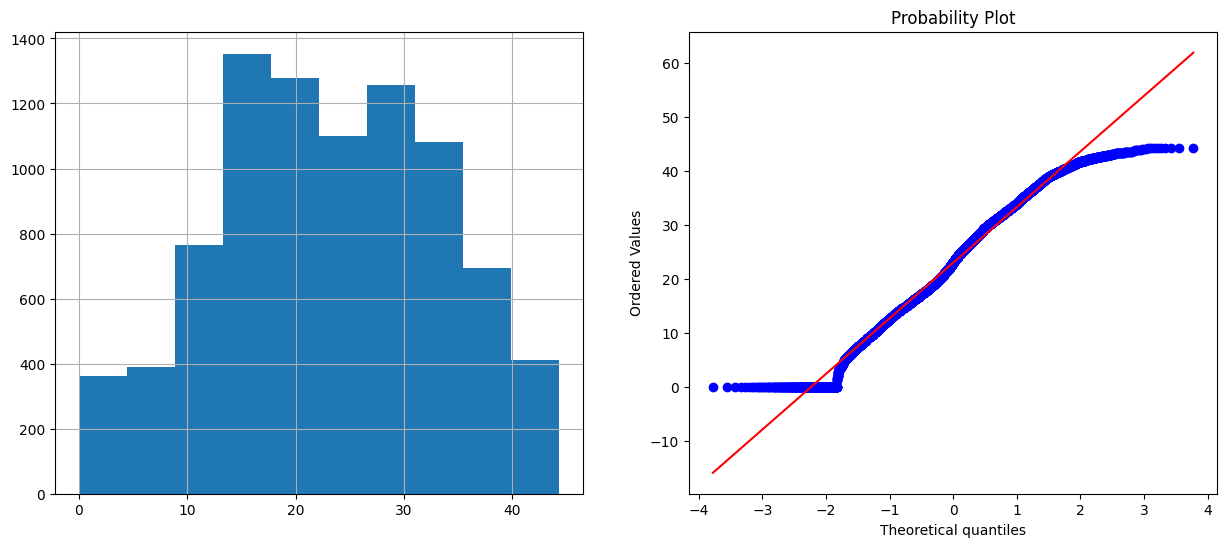

In [396]:
# boxcox
new_data['Rented_Bike_Count_boxcox'], param = stats.boxcox(new_data.Rented_Bike_Count+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(new_data, 'Rented_Bike_Count_boxcox')

In [397]:
new_data['Rented_Bike_Count_boxcox'].skew()

-0.14098683323484523

In [398]:
import pandas as pd
from scipy.stats import skew

# Calculate skewness of each feature
skewness = num_dat.apply(skew)

# Define the threshold for acceptable skewness
threshold = 0.5

# Check skewness of each feature
for column in skewness.index:
    if abs(skewness[column]) > threshold:
        if skewness[column] < 0:
            print(f"Feature '{column}' is left-skewed with skewness {skewness[column]:.2f}")
        else:
            print(f"Feature '{column}' is right-skewed with skewness {skewness[column]:.2f}")
    else:
        print(f"Feature '{column}' has acceptable skewness")



Feature 'Rented_Bike_Count' is right-skewed with skewness 1.15
Feature 'Hour' has acceptable skewness
Feature 'Temperature' has acceptable skewness
Feature 'Humidity' has acceptable skewness
Feature 'Wind_speed' is right-skewed with skewness 0.89
Feature 'Visibility' is left-skewed with skewness -0.70
Feature 'Dew_point_temperature' has acceptable skewness
Feature 'Solar_Radiation' is right-skewed with skewness 1.50
Feature 'Rainfall' is right-skewed with skewness 14.53
Feature 'Snowfall' is right-skewed with skewness 8.44


<Axes: xlabel='Rainfall', ylabel='Density'>

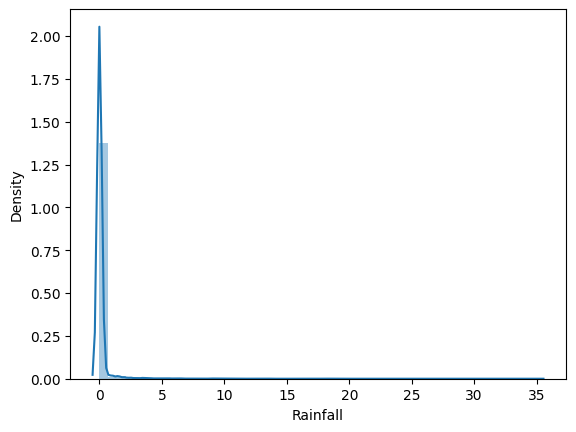

In [399]:
sns.distplot(data['Rainfall'])

In [400]:


# Apply square root transformation to the "Rainfall" feature
data['Rainfall_transformed'] = np.sqrt(data['Rainfall'])


In [401]:
data['Rainfall_transformed'].skew()

6.6351459550336935

<Axes: xlabel='Rainfall_transformed', ylabel='Density'>

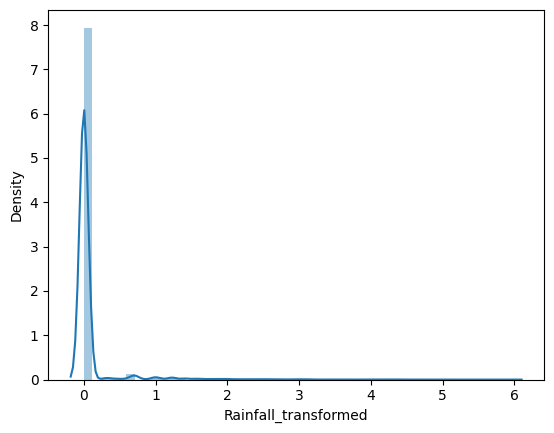

In [402]:
sns.distplot(data['Rainfall_transformed'])

In [403]:
from scipy.stats.mstats import winsorize

# Winsorize the "Rainfall" feature
data['Rainfall_transformed_win'] = winsorize(data['Rainfall'], limits=[0.05, 0.05])


In [404]:
data['Rainfall_transformed_win'].skew()

3.9230300436842622

In [405]:
# !pip install sweetviz


In [406]:
# import pandas as pd

# import sweetviz as sv

# Load your data
# data = pd.read_csv('your_data.csv')

# Generate the Sweetviz report
# report = sv.analyze(data)

# Visualize the report
# report.show_html()


#Multicollinearity

In [407]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [408]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented_Bike_Count']]])

variables         VIF
0                       Hour    4.463118
1                Temperature  193.246946
2                   Humidity  198.181092
3                 Wind_speed    4.857790
4                 Visibility   10.481355
5      Dew_point_temperature  130.407112
6            Solar_Radiation    2.889427
7                   Rainfall   16.474633
8                   Snowfall    1.136351
9                  date_year  422.221055
10               date_months    4.723005
11          weekdays_weekend    3.468611
12      Rainfall_transformed   41.663830
13  Rainfall_transformed_win   12.731212

In [409]:
# Let's drop Dew point temperature feature because it can create problem and it is also highly correlated with Temperature
data.drop(['Dew_point_temperature'],axis=1, inplace=True)

In [410]:
new_data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day',
       'date_year', 'date_months', 'date_day', 'weekdays_weekend',
       'Temperature_Bins', 'Log_Rented_Bike_Count', 'Rec_Rented_Bike_Count',
       'sqr_Rented_Bike_Count', 'Exp_Rented_Bike_Count',
       'Rented_Bike_Count_boxcox'],
      dtype='object')

In [411]:
new_data.drop(['Dew_point_temperature','Temperature_Bins','Log_Rented_Bike_Count','Rec_Rented_Bike_Count','Exp_Rented_Bike_Count','Rented_Bike_Count_boxcox'],axis=1,inplace=True)

In [412]:
new_data.drop(['date_day'],axis=1,inplace=True)

In [413]:
new_data.drop(['Rented_Bike_Count'],axis=1,inplace=True)

In [414]:
new_data.drop(['Date'],axis=1,inplace=True)

# ***Modeling start***

In [415]:
#Assign all catagoriacla features to a variable
categorical_features=list(new_data.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Seasons', 'Holiday', 'Functioning_Day'], dtype='object')

In [416]:
new_data['Holiday'].value_counts()

No Holiday    8261
Holiday        432
Name: Holiday, dtype: int64

In [417]:
new_data.columns

Index(['Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday',
       'Functioning_Day', 'date_year', 'date_months', 'weekdays_weekend',
       'sqr_Rented_Bike_Count'],
      dtype='object')

In [418]:
new_data.head()

Hour  Temperature  Humidity  Wind_speed  Visibility  Solar_Radiation  \
0     0         -5.2        37         2.2        2000              0.0   
1     1         -5.5        38         0.8        2000              0.0   
2     2         -6.0        39         1.0        2000              0.0   
3     3         -6.2        40         0.9        2000              0.0   
4     4         -6.0        36         2.3        2000              0.0   

   Rainfall  Snowfall Seasons     Holiday Functioning_Day  date_year  \
0       0.0       0.0  Winter  No Holiday             Yes       2017   
1       0.0       0.0  Winter  No Holiday             Yes       2017   
2       0.0       0.0  Winter  No Holiday             Yes       2017   
3       0.0       0.0  Winter  No Holiday             Yes       2017   
4       0.0       0.0  Winter  No Holiday             Yes       2017   

   date_months  weekdays_weekend  sqr_Rented_Bike_Count  
0            1                 1              15.937377  
1            1                 1              14.282857  
2            1                 1              13.152946  
3            1                 1              10.344080  
4            1                 1               8.831761

In [419]:


# Apply one-hot encoding on categorical features
new_data = pd.get_dummies(new_data, columns=['Seasons', 'Holiday', 'Functioning_Day'])



In [420]:
new_data.describe().T

count         mean         std     min          25%  \
Hour                   8693.0    11.448637    6.924253     0.0     5.000000   
Temperature            8693.0    12.786391   11.935148   -17.8     3.300000   
Humidity               8693.0    58.299551   20.401425     0.0    42.000000   
Wind_speed             8693.0     1.719694    1.036627     0.0     0.900000   
Visibility             8693.0  1434.553779  609.194344    27.0   934.000000   
Solar_Radiation        8693.0     0.567629    0.871333     0.0     0.000000   
Rainfall               8693.0     0.149833    1.132457     0.0     0.000000   
Snowfall               8693.0     0.075647    0.438376     0.0     0.000000   
date_year              8693.0  2017.914414    0.279768  2017.0  2018.000000   
date_months            8693.0     6.525365    3.454618     1.0     4.000000   
weekdays_weekend       8693.0     0.707811    0.454795     0.0     0.000000   
sqr_Rented_Bike_Count  8693.0    23.202603   12.190327     0.0    13.784049   
Seasons_Autumn         8693.0     0.249741    0.432888     0.0     0.000000   
Seasons_Spring         8693.0     0.252157    0.434276     0.0     0.000000   
Seasons_Summer         8693.0     0.249626    0.432822     0.0     0.000000   
Seasons_Winter         8693.0     0.248476    0.432154     0.0     0.000000   
Holiday_Holiday        8693.0     0.049695    0.217327     0.0     0.000000   
Holiday_No Holiday     8693.0     0.950305    0.217327     0.0     1.000000   
Functioning_Day_No     8693.0     0.033935    0.181073     0.0     0.000000   
Functioning_Day_Yes    8693.0     0.966065    0.181073     0.0     1.000000   

                               50%         75%          max  
Hour                     11.000000    17.00000    23.000000  
Temperature              13.600000    22.30000    39.400000  
Humidity                 57.000000    74.00000    98.000000  
Wind_speed                1.500000     2.30000     7.400000  
Visibility             1694.000000  2000.00000  2000.000000  
Solar_Radiation           0.010000     0.93000     3.520000  
Rainfall                  0.000000     0.00000    35.000000  
Snowfall                  0.000000     0.00000     8.800000  
date_year              2018.000000  2018.00000  2018.000000  
date_months               7.000000    10.00000    12.000000  
weekdays_weekend          1.000000     1.00000     1.000000  
sqr_Rented_Bike_Count    22.271057    32.41913    51.351728  
Seasons_Autumn            0.000000     0.00000     1.000000  
Seasons_Spring            0.000000     1.00000     1.000000  
Seasons_Summer            0.000000     0.00000     1.000000  
Seasons_Winter            0.000000     0.00000     1.000000  
Holiday_Holiday           0.000000     0.00000     1.000000  
Holiday_No Holiday        1.000000     1.00000     1.000000  
Functioning_Day_No        0.000000     0.00000     1.000000  
Functioning_Day_Yes       1.000000     1.00000     1.000000

In [421]:


# Split the data into training and testing datasets
X = new_data.drop('sqr_Rented_Bike_Count', axis=1)  # Replace 'target_variable' with the name of your target column
y = new_data['sqr_Rented_Bike_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the machine learning model
model = LinearRegression()  # Replace with your desired algorithm
model.fit(X_train, y_train)

# Make predictions on training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate accuracy scores
train_accuracy_m = mean_squared_error(y_train, train_predictions)
test_accuracy_m = mean_squared_error(y_test, test_predictions)

# Calculate accuracy scores
train_accuracy_r = r2_score(y_train, train_predictions)
test_accuracy_r = r2_score(y_test, test_predictions)

print("Training Accuracy mean squared error:", train_accuracy_m)
print("Testing Accuracy mean squared error:", test_accuracy_m)

print("Training Accuracy r2 score :", train_accuracy_r)
print("Testing Accuracy r2 score :", test_accuracy_r)

Training Accuracy mean squared error: 51.48084648464413
Testing Accuracy mean squared error: 50.530708538938285
Training Accuracy r2 score : 0.657898998862125
Testing Accuracy r2 score : 0.6415942563846576


In [422]:
X.head()

Hour  Temperature  Humidity  Wind_speed  Visibility  Solar_Radiation  \
0     0         -5.2        37         2.2        2000              0.0   
1     1         -5.5        38         0.8        2000              0.0   
2     2         -6.0        39         1.0        2000              0.0   
3     3         -6.2        40         0.9        2000              0.0   
4     4         -6.0        36         2.3        2000              0.0   

   Rainfall  Snowfall  date_year  date_months  weekdays_weekend  \
0       0.0       0.0       2017            1                 1   
1       0.0       0.0       2017            1                 1   
2       0.0       0.0       2017            1                 1   
3       0.0       0.0       2017            1                 1   
4       0.0       0.0       2017            1                 1   

   Seasons_Autumn  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0               0               0               0               1   
1               0               0               0               1   
2               0               0               0               1   
3               0               0               0               1   
4               0               0               0               1   

   Holiday_Holiday  Holiday_No Holiday  Functioning_Day_No  \
0                0                   1                   0   
1                0                   1                   0   
2                0                   1                   0   
3                0                   1                   0   
4                0                   1                   0   

   Functioning_Day_Yes  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [423]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: sqr_Rented_Bike_Count, dtype: float64

ValueError: ignored

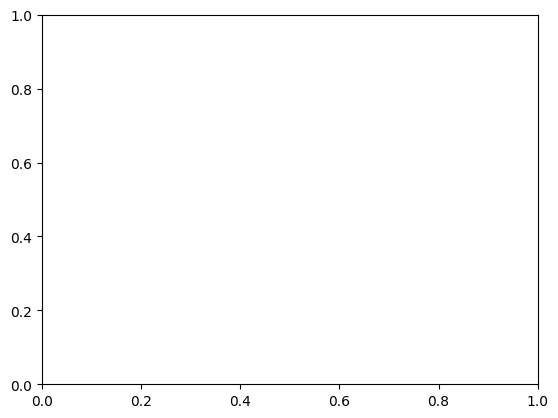

In [424]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

In [ ]:
y_train.size

In [ ]:
X_train = np.resize(X_train, (len(y_train),))
X_train.size

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the target variable
y_pred = model.predict(X)

# Use the original target variable for y_actual
y_actual = y


In [ ]:
residuals = y_actual - y_pred


In [ ]:
import numpy as np

mean_residuals = np.mean(residuals)
mean_residuals

In [ ]:
residuals

In [ ]:
new_data.info()

In [ ]:
# Example dataset
data = [4, 2, 6, 8, 5]

# Calculate mean
mean = sum(data) / len(data)

# Calculate squared differences from the mean
squared_diff = [(x - mean) ** 2 for x in data]

# Calculate variance
variance = sum(squared_diff) / len(data)

# Calculate standard deviation
std_deviation = variance ** 0.5

print("Variance:", variance)
print("Standard Deviation:", std_deviation)


In [ ]:
import numpy as np

# Example dataset
data = [4, 2, 6, 8, 5]

# Calculate variance
variance = np.var(data)

# Calculate standard deviation
std_deviation = np.std(data)

print("Variance:", variance)
print("Standard Deviation:", std_deviation)


In [ ]:
y.head()

In [ ]:
num_dat

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataset is named 'num_dat' and the target variable is 'Rented_Bike_Count'

# Get the column names of numeric features (excluding the first column)
feature_columns = num_dat.columns[1:]

# Iterate over each feature column
for col in feature_columns:
    fig, ax = plt.subplots(figsize=(9, 6))
    feature = num_dat[col]
    label = num_dat['Rented_Bike_Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented_Bike_Count')
    ax.set_title('Rented_Bike_Count vs ' + col + ' (correlation: ' + str(correlation) + ')')
    z = np.polyfit(num_dat[col], num_dat['Rented_Bike_Count'], 1)
    y_hat = np.poly1d(z)(num_dat[col])

    plt.plot(num_dat[col], y_hat, "r--", lw=1)

    plt.show()


In [ ]:


# Get the column names of numeric features (excluding the first column)
feature_columns = num_dat.columns[1:]

# Iterate over each feature column
for col in feature_columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = num_dat[col]
    label = num_dat['Rented_Bike_Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented_Bike_Count')
    ax.set_title('Rented_Bike_Count vs ' + col + ' (correlation: ' + str(correlation) + ')')
    z = np.polyfit(num_dat[col], num_dat['Rented_Bike_Count'], 1)
    y_hat = np.poly1d(z)(num_dat[col])

    plt.plot(num_dat[col], y_hat, "r--", lw=1)

plt.show()


#**LASSO REGRESSION** 

In [ ]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:

#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


**Looks like our r2 score value is 0.46 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**